##                        Projet PHY560 : effondrement gravitationnel d'une étoile





In [3]:
from math import*
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns
sns.set_style("darkgrid")

Ce projet concerne la présentation du cadre théorique de l'effondrement d'une étoile sous son propre poids. Pour étudier la physique en jeu, plusieurs représentations d'effondrements d'une étoile sera représenté, avec le minimum du formalisme théorique qui l'accompagne. Le cadre général est le suivant: une étoile en fin de vie arrive au bout du combustible exploitable dans son coeur. Pour rester générale, trois scénarios sont alors envisageables, l'étoile va devenir une naine blanche, une étoile à neutron ou un trou noir. On ne retiendra que la dernière possibilité dans notre cas, c'est-à-dire qu'au bout d'un certain moment, le rayon de l'étoile en effondrement sera inférieur au rayon de Schwarzschild : $R_s = \frac{2GM}{c^2}$. On considérera $G = c = 1$ dans ce notebook. 

Lorsque les réactions s'arrêtent, l'étoile sera supposé n'être considérer que de 'poussière', de matière froide d'indice adiabatique $\gamma = 1$. On aura alors $P = 0$, rien ne s'opposera à l'effondrement de l'étoile, son équation du mouvement est uniquement régie par la métrique de l'espace-temps. On néglige donc totalement la thermodynamique en jeu, seul la relativité générale sera étudiée. L'étoile sera supposée à symétrie sphérique et homogène, du moins jusqu'à sa surface.

On va traiter le problème de l'effondrement dans deux régions d'espace-temps différentes: $R < R_{astre}(t)$ et $R > R_{astre}(t)$.

Effondrement d'une étoile : Système T.O.V

Dans l'hypothèse d'une étoile de densité constante, on peut résoudre complétement le système T.O.V et en déduire les variables d'états de l'étoile. Le système T.O.V est la généralisation des équations d'équilibres stellaires dans le cas d'objet compact où la relativité générale devient la seule et unique manière de décrire correctement les quantités physiques en jeu. On va mettre en jeu des équations de la thermodynamiques. 

En relativité générale, un astre statique et à symétrie sphérique est décrit par les équations suivantes :
$$
\frac{dm}{dr} = 4 \pi r^2 \rho(r)
$$
$$
\frac{dP}{dr} = -\big(\rho(r) + P(r)/c^2\big)\frac{d\Phi}{dr}
$$
$$
\frac{d\Phi}{dr} = \frac{Gm(r)}{r^2}\bigg(1 - \frac{2Gm(r)}{rc^2}\bigg)^{-1}\bigg(1 + 4\pi\frac{P(r)r^3}{m(r)c^2}\bigg)
$$

Avec l'hypothèse grossière que l'astre possède une masse volumique constante $\rho_c$, on a la solution suivante pour $r<R$
$$
m(r) = M\big(\frac{r}{R}\big)^3
$$

$$
P(r) = c^2\rho_c\frac{\sqrt{1 - 2Ξ(\frac{r}{R})^2} - \sqrt{1 - 2\Xi}}{3\sqrt{1 6 2\Xi} - \sqrt{1 - 2\Xi(\frac{r}{R})^2}}
$$

$$
\Phi(r) = c^2\log{\frac{3\sqrt{1 - 2\Xi} - \sqrt{1 - 2\Xi(\frac{r}{R}})^2}{2}}
$$
et pour $r>R$:
$$
m(r) = M
$$

$$
P(r) = 0
$$

$$
\Phi(r) = c^2/2\log{1 - 2\Xi(R/r)}
$$
avec $X_i = \frac{GM}{Rc^2}$ le paramètre de compacité. 

In [4]:
Xsi = [4/9*i/10 for i in range(11)]
R_astre = 4
nb_point = 20
Ri = 5
R = [Ri*i/nb_point for i in range(nb_point,0,-1)]
rho_c = 1 #Densité centrale supposé uniforme
M_astre = np.empty(nb_point) #Masse centrale
P = np.empty(nb_point) #Pression
Phi = np.empty(nb_point) #Potentiel gravitationnel
rdm = Xsi[np.random.randint(10)]
M = 1
for i in range(nb_point):
  if (R[i] < R_astre):
    M_astre[i] = M*(R[i]/R_astre)**3
    P[i] = rho_c*(np.sqrt(1 - 2*rdm*(R[i]/R_astre)**2) - np.sqrt(1 - 2*rdm))/(3*np.sqrt(1 - 2*rdm) - np.sqrt(1 - 2*rdm*(R[i]/R_astre)**2))
    Phi[i] = np.log((3*np.sqrt(1 - 2*rdm) - np.sqrt(1 - 2*rdm*(R[i]/R_astre)**2))/2)
  else:
    M_astre[i] = M
    P[i] = 0
    Phi[i] = 1/2*np.log(1 - 2*rdm*R_astre/R[i])

On fait ici varier le paramètre de compacité de 0 à 4/9, compacité maximale théorique d'un astre statique à symétrie sphérique à densité constante. 

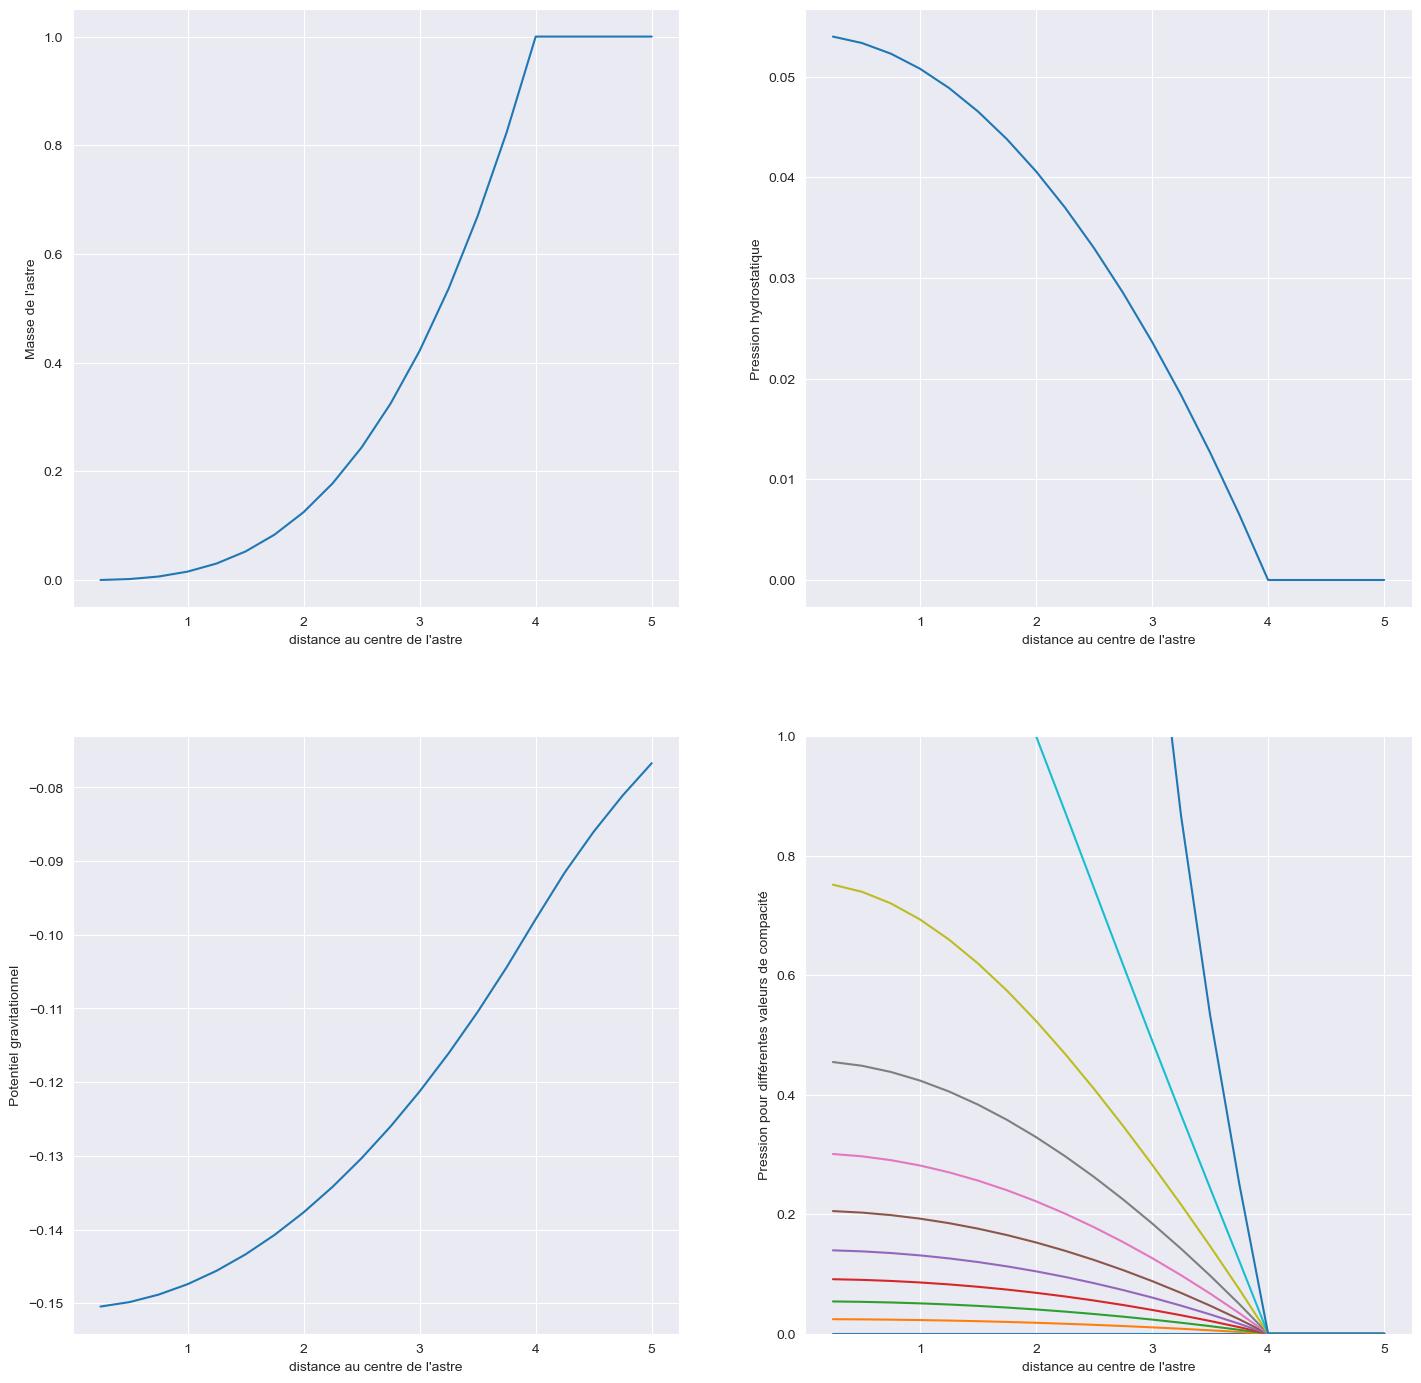

In [5]:
fig, axs = plt.subplots(2,2)
fig.tight_layout()
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0,0].plot(R,M_astre)
axs[0,0].set_xlabel("distance au centre de l'astre")
axs[0,0].set_ylabel("Masse de l'astre")

axs[0,1].plot(R,P)
axs[0,1].set_xlabel("distance au centre de l'astre")
axs[0,1].set_ylabel("Pression hydrostatique")

axs[1,0].plot(R,Phi)
axs[1,0].set_xlabel("distance au centre de l'astre")                           
axs[1,0].set_ylabel("Potentiel gravitationnel")

P_prime = np.empty(nb_point)

for i in range(11):
    for j in range(nb_point):
      if (R[j] < R_astre):
        P_prime[j] = rho_c*(np.sqrt(1 - 2*Xsi[i]*(R[j]/R_astre)**2) - np.sqrt(1 - 2*Xsi[i]))/(3*np.sqrt(1 - 2*Xsi[i]) - np.sqrt(1 - 2*Xsi[i]*(R[j]/R_astre)**2))
      else:
        P_prime[j] = 0
    axs[1,1].set_ylim([0,1])
    axs[1,1].set_xlabel("distance au centre de l'astre")
    axs[1,1].set_ylabel("Pression pour différentes valeurs de compacité")
    axs[1,1].plot(R,P_prime)

In [6]:
def phi(r):
  phi_1 = np.sin(r)/r
  return phi_1

In [7]:
def solve_m(r,rh):
  m_p = 4*np.pi*r**2*phi(r/a)*rho_c
  return m_p

In [8]:
#P[0] = rho, P[1] = Phi, P[2] = P
def f(r,P):
  rho_c = M/(4*a**3*np.pi**2)
  m = solve_ivp(solve_m, [0.0001, r], [0])
  Phi_p = m.y[0][-1]/r**2*(1 - 2*m.y[0][-1]/r)**(-1)*(1 + 4*np.pi*P[2]*r**3/m.y[0][-1])
  P_p = - (rho_c*phi(r/a) + P[2])*Phi_p
  m_p = 4*np.pi*rho_c*phi(r/a)*r**2
  return [m_p,Phi_p, P_p]

In [9]:
Xsi = [4/9*i/10 for i in range(11)]
a = np.sqrt(2/(4*np.pi))
rdm = Xsi[np.random.randint(10)]
M = 1
Phi_p = -1/np.pi
P_c = 1/(8*np.pi)*Phi_p**2*1/(a*np.pi)**4
#O = solve_ivp(f,[0.0001, 0.1], [0, 0,P_c])

## Diagramme de plongement

Un diagramme de plongement est une représentation 3D de l'espace temps, modulo certaines projections. Dans notre cas, nous allons nous concentrer sur les hypersurfaces suivantes : $\theta = \pi/2$ et $t = cst$. 
De manière générale, on peut écrire alors la métrique sous la forme:
$ds^2 = g_{rr}^2dr^2 = \frac{1}{1 - 2m(r)/r}$
Dans notre plongement 2D, on prendre une échelle linéaire et une fonction $f(r) = z$ caractérisant la profondeur du puit.

Ainsi, on aura alors $ds^2 = 1dx^2 + f'(r)^2dz^2$. En posant l'égalité des longueurs infinitésimal, on trouve alors qu'il faut avoir $g_{rr}^2 = 1 + f'(r)^2$
On obtient alors $f'(r) = \sqrt{\frac{2M}{r - 2m(r)}}$. Il y a clairement une singularité en $r = 2M$, ce qui était prévisible en coordonnée de Schwarzschild. Par conséquent, on ne résoudra l'équation qu'en 2 intervalles : 
$[0,R_{astre}]$ et $[R_{astre}, R_{max}]$, tout en racollant bien entendu en $R_{astre}$. On imposera $f(R_{astre}) = 0$. 

Remarquons immédiatement que pour $r$ très grand, on a $f'(r) \approx \frac{1}{\sqrt{r}}$ et donc $f(r) \approx \sqrt{r}$. On ne s'étonnera donc pas de ne pas avoir un espace asymptotiquement plat pour $r \gg 2M$

On commence par représenter les diagrammes de plongement d'une étoile selon sa compacité (entre 0 et 4/9). On trace également son rayon de Schwarzschild.

In [10]:
#Diagramme de plongement
r=1                                 # On considère ici un astre de rayon 1
Xi=0.1                             # Compacité (comprise entre 0 et 4/9)

M=r*Xi
rs=2*M
b=[i*r/10 for i in range(10,100)]
a=[-i for i in b]
za1=[2*sqrt(rs)*sqrt(abs(i)-rs)-2*sqrt(rs)*sqrt(abs(r)-rs) for i in a]
zb1=[2*sqrt(rs)*sqrt(abs(i)-rs)-2*sqrt(rs)*sqrt(abs(r)-rs) for i in b]

plt.plot(a,za, color="b")
plt.plot(b,zb1,color="b")
line1,=plt.plot([-r, r],[za[0],zb1[0]],'o',color="r")
line2,=plt.plot([-2*M,2*M],[za1[0],zb1[0]],color="g")

plt.title("Diagramme de plongement: Xi=4/9")
plt.xlabel("Rayon de l'astre")
plt.legend([line1, line2], ['Rayon de l astre', 'Rayon de Schwarzshild'])
plt.show

NameError: name 'za' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

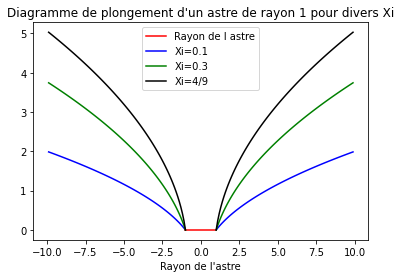

In [ ]:
#Diagramme de plongement
r=1                                 # On considère ici un astre de rayon 1
Xi1=0.1  
Xi2=0.3
Xi3= 4/9                            # Compacité (comprise entre 0 et 4/9)

M1=r*Xi1
rs1=2*M1
b1=[i*r/10 for i in range(10,100)]
a1=[-i for i in b1]
za1=[2*sqrt(rs1)*sqrt(abs(i)-rs1)-2*sqrt(rs1)*sqrt(abs(r)-rs1) for i in a1]
zb1=[2*sqrt(rs1)*sqrt(abs(i)-rs1)-2*sqrt(rs1)*sqrt(abs(r)-rs1) for i in b1]

M2=r*Xi2
rs2=2*M2
b2=[i*r/10 for i in range(10,100)]
a2=[-i for i in b2]
za2=[2*sqrt(rs2)*sqrt(abs(i)-rs2)-2*sqrt(rs2)*sqrt(abs(r)-rs2) for i in a2]
zb2=[2*sqrt(rs2)*sqrt(abs(i)-rs2)-2*sqrt(rs2)*sqrt(abs(r)-rs2) for i in b2]

M3=r*Xi3
rs3=2*M3
b3=[i*r/10 for i in range(10,100)]
a3=[-i for i in b3]
za3=[2*sqrt(rs3)*sqrt(abs(i)-rs3)-2*sqrt(rs3)*sqrt(abs(r)-rs3) for i in a3]
zb3=[2*sqrt(rs3)*sqrt(abs(i)-rs3)-2*sqrt(rs3)*sqrt(abs(r)-rs3) for i in b3]

line1,=plt.plot(a1,za1, color="b")
plt.plot(b1,zb1,color="b")
line1a,=plt.plot([-r, r],[za1[0],zb1[0]],'-',color="r")

line2a,=plt.plot(a2,za2, color="g")
plt.plot(b2,zb2,color="g")


line3a,=plt.plot(a3,za3, color="black")
plt.plot(b3,zb3,color="black")


plt.title("Diagramme de plongement d'un astre de rayon 1 pour divers Xi")
plt.xlabel("Rayon de l'astre")
plt.legend([line1a,line1,line2a,line3a], ['Rayon de l astre','Xi=0.1','Xi=0.3','Xi=4/9'])
plt.show

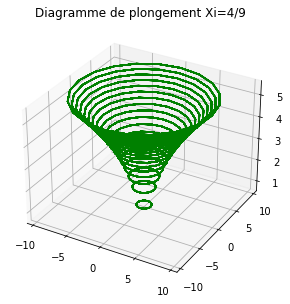

In [ ]:
#Diagramme de plongement
r=1
Xi=4/9
M=Xi*r
rs=2*M
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

Theta=[i*pi/10 for i in range(-100,100)]
R=[i*r/2 for i in range(2,20)]
X=[]
Y=[]
Z=[]
for j in R:
  X.append([j*cos(theta) for theta in Theta])
  Y.append([j*sin(theta) for theta in Theta])
  Z.append([2*sqrt(rs)*sqrt(j-rs)  for theta in Theta])

for i in range(len(R)):
  # plotting
  ax.plot3D(X[i], Y[i], Z[i], 'green')

plt.tight_layout()
plt.title("Diagramme de plongement Xi=4/9")
plt.show()

On s'intéresse maintenant au cas du trou noir (masse ponctuelle en R=0). Comme déjà mentionné, il y a une singularité en $R=R_s=2M$. On cherche donc à résoudre le problème en découpant l'espace en deux morceaux $R>R_s$ et $R<R_s$ et en raccordant en $R=R_s$.
La méthode de résolution numérique employé est <code>DOP853</code>.

In [11]:
def h_p(r, h):
  if (r <= Rp):
    return np.sqrt(2*M/(r - 2*M*(r/Rp)**3))
  elif (r > Rp):
    return np.sqrt(2*M/(r - 2*M))
  elif (r == 0):
    return 1

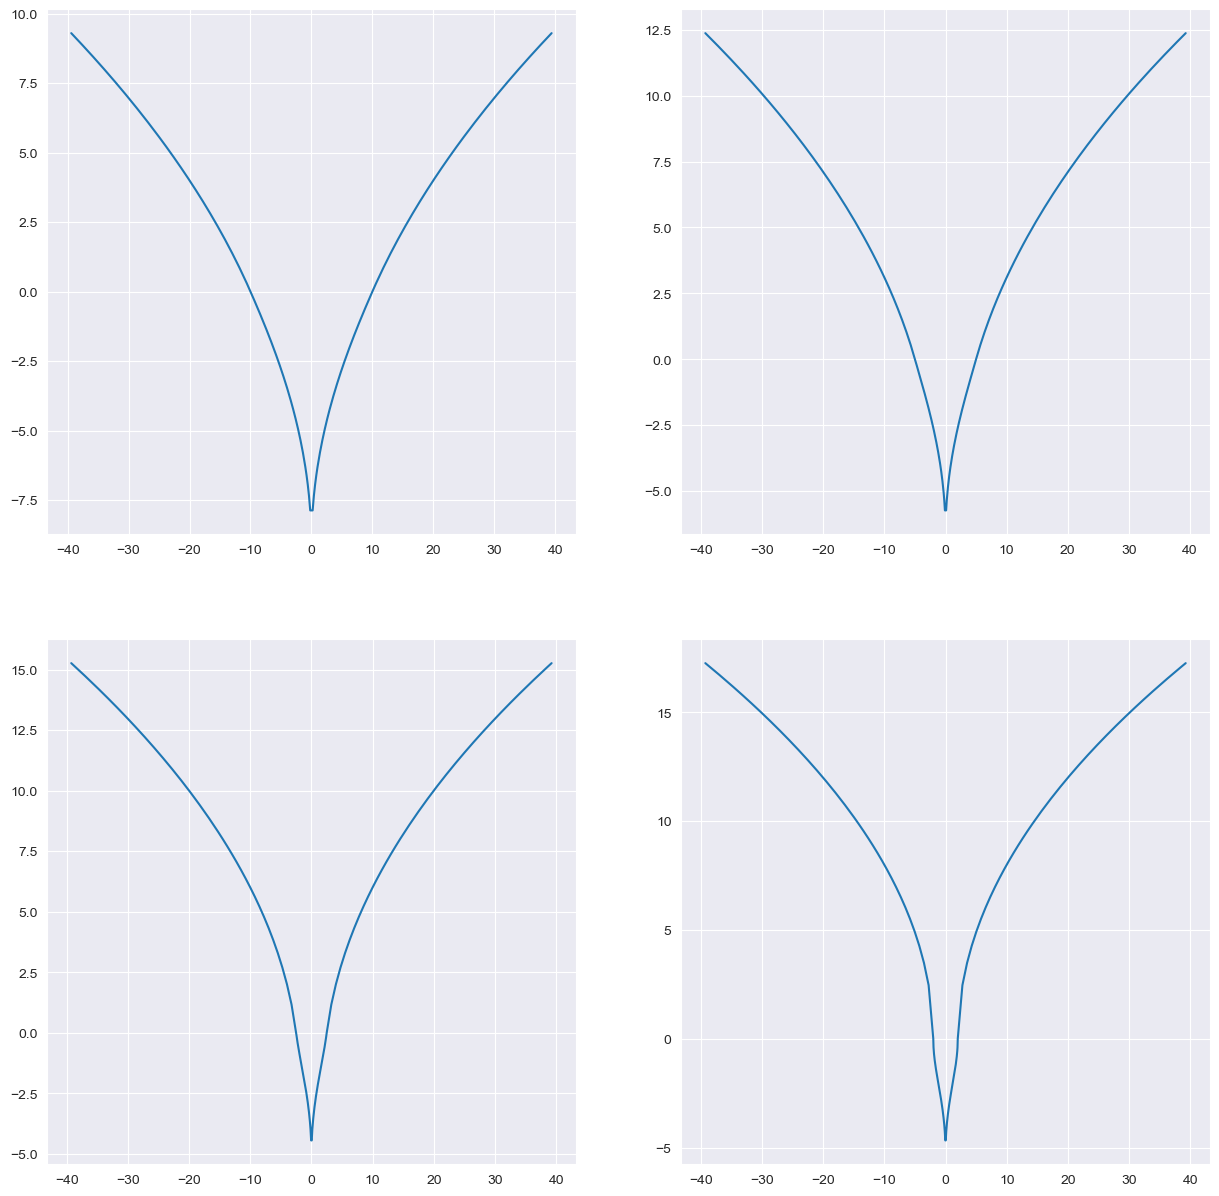

In [12]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
R_astre = [10, 5, 2.5, 2.00001]
Nbe = 50
M = 1
R_max = 40
i = 0
for Rp in R_astre:
  R_int = [i*Rp/Nbe for i in range(1,Nbe)]
  R_int_flip = np.flip(R_int)
  R_int_n = [-R_int[i] for i in range(Nbe-1)]
  R_int_n.reverse()
  R_ext = [Rp + i*(R_max - Rp)/Nbe for i in range(Nbe)]
  R_ext_n = [-R_ext[i] for i in range(Nbe)]
  R_ext_n.reverse()
  H_int = solve_ivp(h_p, [Rp, 0.001], [0], method = "DOP853", t_eval = R_int_flip) #Singularité en 0
  H_ext = solve_ivp(h_p, [Rp, R_max], [0], method = "DOP853", t_eval = R_ext)
  R_total = [*R_ext_n, *R_int_n, *R_int, *R_ext]
  H_int_flip = np.flip(H_int.y[0])
  H = [*H_int_flip, *H_ext.y[0]]
  H_reverse = np.flip(H)
  H_total = [*H_reverse, *H]
  axs[i//2, i%2].plot(R_total, H_total)
  i+=1

## Tracé de la trajectoire en coordonnée Schwarzschild

On se place dans les coordonnées de Schwarzschild $(t,r,\theta, \phi)$. L'étoile étant supposé statique et à symétrie sphysique, le théorème de Birkoff nous apprend que l'on peut considérer localement la métrique **à l'extérieur** de l'astre. Elle prend la forme : $ds^2 = -\big(1 - \frac{2M}{r}\big)dt^2 + \frac{dr^2}{1 - \frac{2M}{r}} + r^2d\Omega^2$.

In [ ]:
N = 10001
eta=[pi*i/10000 for i in range(N)]
R = np.zeros(N)
Ri = 5
t = np.zeros(N)
for i in range(len(R)):
  R[i] = Ri/2*(1+np.cos(eta[i]))
  t[i] = 2*M*np.log(np.abs(np.sqrt(Ri/(2*M) - 1) + np.tan(eta[i]/2))/np.abs(np.sqrt(Ri/(2*M) - 1) - np.tan(eta[i]/2))) + 2*M*np.sqrt(Ri/(2*M) - 1)*(eta[i] + Ri/(4*M)*(eta[i] + np.sin(eta[i])))

Text(0, 0.5, 'temps')

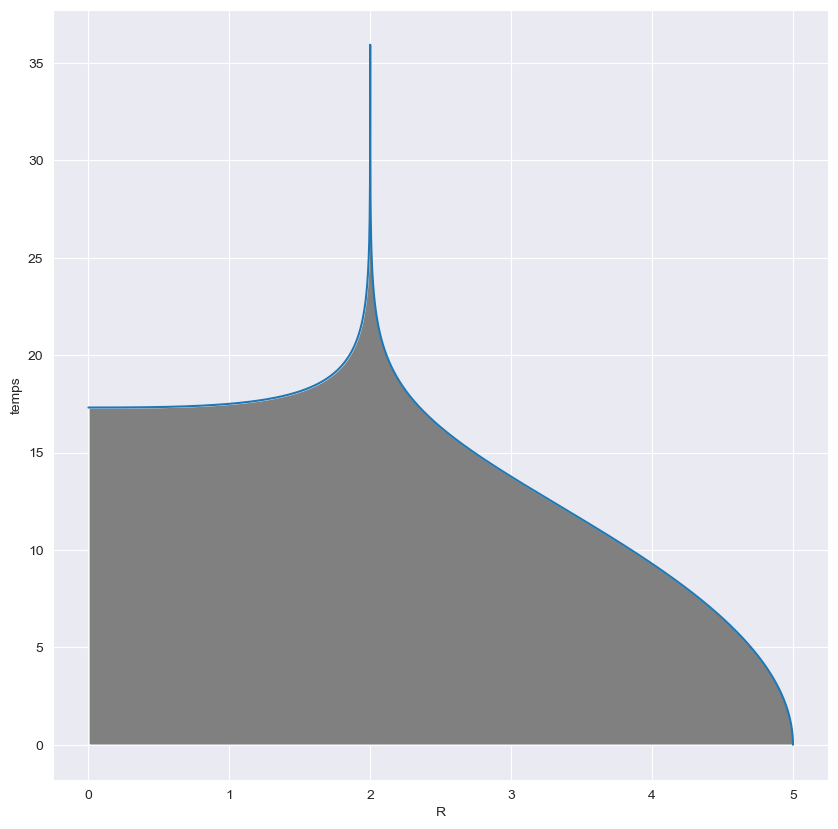

In [14]:
plt.figure(figsize = (10,10))
plt.fill_between(R, t, where=R>0, facecolor='grey')
plt.plot(R,t)
plt.xlabel("R")
plt.ylabel("temps")

## Tracé des cônes de lumière en coordonnée de Schwarzschild

Pour tracer les cônes de lumière, il faut trouver les géodésiques de longueur espace-temps nul. On doit donc avoir $ds^2 = 0$, ce qui équivaut à 
$$
\frac{dt}{dr} = \big|1 - 2M/r \big|^{-1}
$$
On constate que l'on ne peut résoudre ce problème que si l'on sépare la région en deux zones: $r<2M$ et $r>2M$. Pour la géodésique sortante, on a : $cte = t + r*$ et pour la géodésique entrante, c'est $cte = t-r^*$. $r^*$ est la coordonnée 'tortue', définie par $r^* = r + 2M\log(\frac{r}{2M} - 1)$. On a donc finalement l'équation pour $r>2M$: 
$$
t = t_{ini} + r - r_{ini} + 2M\log\bigg(\frac{\frac{r}{2M} - 1}{\frac{R_{ini}}{2M} - 1}\bigg)
$$
pour la première branche du cône
$$
t = t_{ini} + r - r_{ini} + 2M\log\bigg(\frac{\frac{r}{2M} - 1}{\frac{R_{ini}}{2M} - 1}\bigg)
$$
pour la seconde. $(R_{ini},t_{ini})$ est le point à partir duquel on souhaite calculer le cône de lumière. 
Pour $r<2M$,
$$
t = t_{ini} + r - r_{ini} + 2M\log\bigg(\frac{\frac{r}{2M} - 1}{\frac{R_{ini}}{2M} - 1}\bigg)
$$
pour la première branche du cône
$$
t = t_{ini} - (r - r_{ini} + 2M\log\bigg(\frac{1 - \frac{r}{2M}}{1 - \frac{R_{ini}}{2M}}\bigg))
$$
pour la seconde.
J'ai volontairement éviter de les tracer proche de la singularité apparente, car il y avait des erreurs numériques.

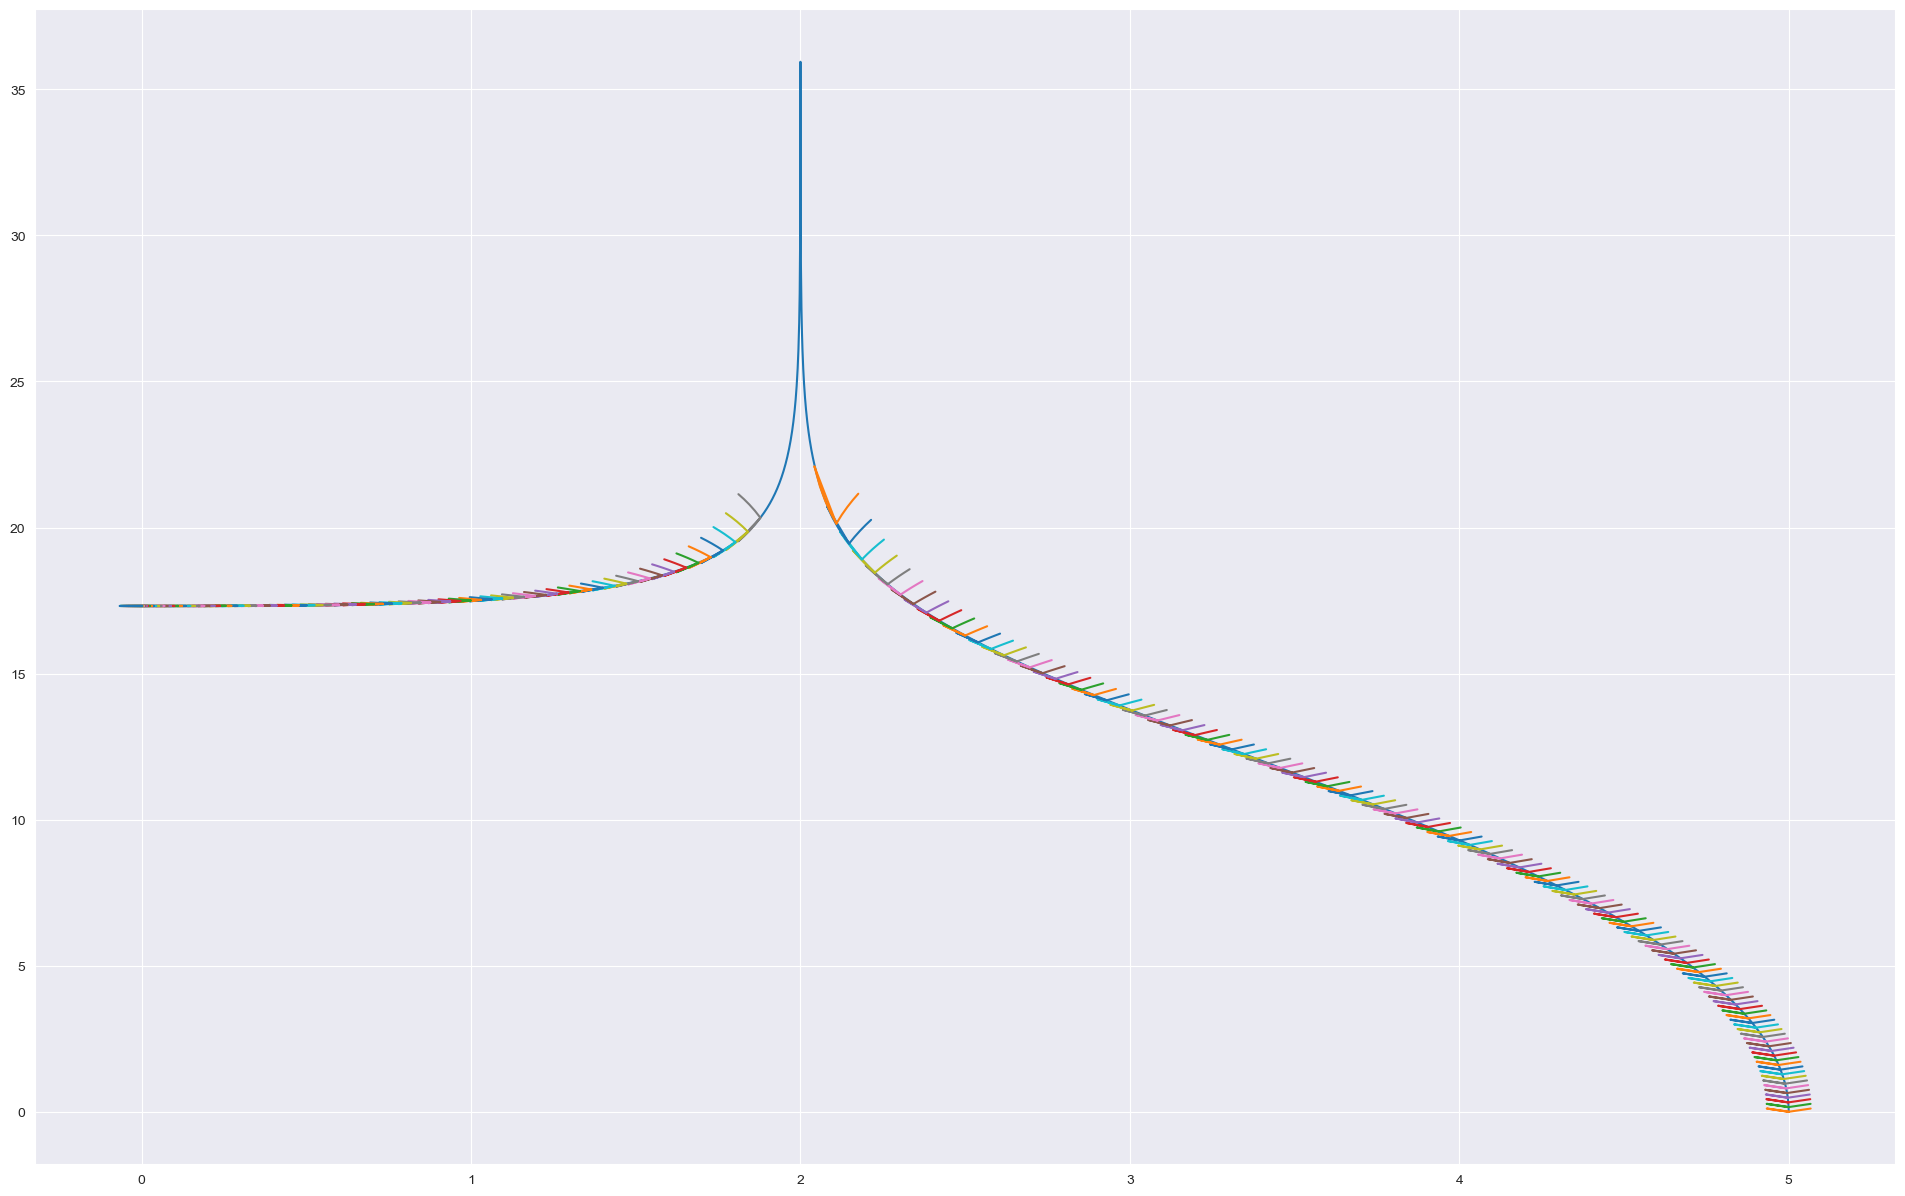

In [15]:
plt.figure(figsize = (15*1.6,15))
plt.plot(R,t)
plt.rcParams["figure.figsize"] = (40, 20)
nb_cone = 200
eps = 0.1 #Paramètre pour éviter le compotement pathologique des cônes près  de r = 2M
lg_cone = 5
cone_t_p = np.zeros((nb_cone,lg_cone))
cone_t_m = np.zeros((nb_cone,lg_cone))
m = [int(N/nb_cone*i) for i in range(nb_cone)]
R_cone_m = np.zeros((nb_cone,lg_cone))
R_cone_p = np.zeros((nb_cone,lg_cone))
max = np.max(t)
#Tracé des cones de lumières
for j in range(nb_cone):
  Rin = R[m[j]] #Rayon initial
  tin = t[m[j]] #temps initial
  for i in range(1,lg_cone): 
    if (Rin > 2 + eps):
      r_m = Rin - i/300*Ri #on diminue r                                         
      r_p = Rin + i/300*Ri #on augmente r 
      cone_t_p[j][0] = tin                                                      
      cone_t_m[j][0] = tin                                                          
      R_cone_p[j][0] = Rin
      R_cone_m[j][0] = Rin
      R_cone_m[j][i] = r_m #On diminue r
      R_cone_p[j][i] = r_p #On augmente r
      cone_t_p[j][i] = tin + r_p - Rin + 2*M*np.log(np.abs(r_p/(2*M) - 1)/np.abs(Rin/(2*M) - 1))   
      cone_t_m[j][i] = tin - (r_m - Rin + 2*M*np.log(np.abs(r_m/(2*M) - 1)/np.abs(Rin/(2*M) - 1)))
    elif (Rin < 2 - eps): #Coordonée de temps et espace sont inversés
      r = Rin - i/300*Ri
      cone_t_p[j][0] = tin
      cone_t_m[j][0] = tin                                                          
      R_cone_p[j][0] = Rin
      R_cone_m[j][0] = Rin
      cone_t_m[j][i] = tin - (r - Rin + 2*M*np.log(np.abs(r/(2*M) - 1)/np.abs(Rin/(2*M) - 1)))
      cone_t_p[j][i] = tin + (r - Rin + 2*M*np.log(np.abs(r/(2*M) - 1)/np.abs(Rin/(2*M) - 1)))
      R_cone_p[j][i] = r 
      R_cone_m[j][i] = r 
    A = [*R_cone_m[j],*R_cone_p[j]]
    B = [*cone_t_m[j],*cone_t_p[j]]
  plt.plot(A, B)

## Chute d'une particule matérielle dans son réferentiel

On doit résoudre dans le réferentiel du corps l'équation des géodésiques. On rappelle qu'il s'agit de 4 équations différentielles d'ordre 2 couplés. L'inconnue est le vecteur position $x^{\mu} = (t,x^1, x^2, x^3) = (t,r,\theta,\phi)$. 
L'équation des géodésiques s'obtient en minimisant l'action $S = ∫\sqrt{g^{\mu \nu}\dot{x}^{\mu}\dot{x}^{\nu}}d\eta$ , et prend par conséquent la forme suivante dans sa forme générique :     
$$
\frac{d^2x^{\mu}}{d\eta^2} + \Gamma_{\nu \gamma}^{\mu}\frac{dx^\nu}{d\eta}\frac{dx^\gamma}{d\eta}  = 0
$$

$\Gamma_{\nu \gamma}^{\mu}$ est le symbole de kristoffel, définie uniquement avec les dérivées premières de la métrique de schwarzschild, et $\eta$ est le temps conforme. On cherchera les géodésiques radiales, c'est à dire avec les conditions initiales : $x^{\mu} = (0,R_i,0,0), \dot{x}^{\mu} = 0$. On suppose bien sûr $R_i > 2M$.

La résolution de cette équation différentielle donne le résultat suivant : 
$$
R = R_i/2(1 + \cos{\eta})
$$
$$
t = 2M\log{\bigg(\frac{\sqrt{R_i/2M - 1} + \tan(\eta/2)}{\sqrt{R_i/2M - 1} - \tan(\eta/2)}\bigg)} + 2M\sqrt{R_i/2M - 1}[\eta + R_i/4M(\eta + \sin(\eta))]
$$

On peut calculer de même le temps propre de la particule en fonction de $\eta$: 
$$
\tau = \bigg(\frac{R_i^3}{8M}\bigg)^{1/2}(\eta + \sin(\eta))
$$
Ce qui donne un temps de chute de $\Delta \tau = \pi \bigg(\frac{R_i^3}{8M}\bigg)^{1/2}$. Dans le cas qu'on traite, $M = 1, R_i = 5$, donc $\Delta \tau = 12.1s $

In [16]:
N = 10001
eta=[pi*i/10000 for i in range(N)]
R = np.zeros(N)
Ri = 5
tau = np.zeros(N)
for i in range(len(R)):
  R[i] = Ri/2*(1+np.cos(eta[i]))
  tau[i] = Ri*np.sqrt(Ri/(2*M))*(np.pi/2 - np.arcsin(np.sqrt(R[i]/Ri)) + np.sqrt(R[i]/Ri)*np.sqrt(1 - R[i]/Ri))

Text(0, 0.5, 'tau')

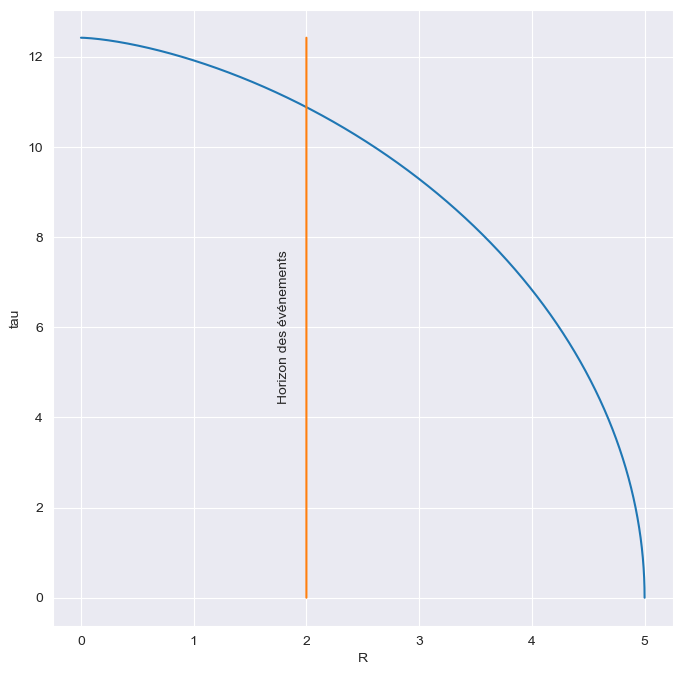

In [17]:
plt.figure(figsize = (8,8))
plt.text(1.8, 6, 'Horizon des événements', horizontalalignment='center', verticalalignment='center', rotation = 'vertical')
plt.plot(R,tau)
plt.plot([2*M for i in range(N)],tau)
plt.xlabel('R')
plt.ylabel('tau')

## Tracé de la trajectoire en coordonnée de Eddington-Finkelstein

Les coordonnées d'Eddington-Finkelstein ont été mis en place afin de remédier à la singularité apparente en $r = R_s$. En effet, les coordonnées de Schwarzschild $(t,r)$ ne peuvent recouvrir tout la variété différentielle d'espace temps. On introduit de nouveau la coordonnée 'tortue'
$ r^* = r + 2M \log(|\frac{r}{2M} - 1|)$. 
On pose alors :    
$
\tilde{V} = t + r^*
$
, $ \tilde{U} = t - r^*$. 
Dans ce système de coordonnée, la métrique prend la forme suivante :
$$
ds^2 = - (1 - 2M/r)d\tilde{V}^2 + 2d\tilde{V}dr + r^2d\Omega
$$
A cause du terme de croisé entre $\tilde{V}$ et $r$, ce jeux de coordonnée n'est pas orthogonal. Pour la représentation graphique, on utilisera plutôt $t' = \tilde{V} - r$. Le couple $(t',r)$ pourra bien être représenté par une grille orthogonale.

In [18]:
N = 10001
eta=[pi*i/10000 for i in range(N)]
R = np.zeros(N)
V = np.empty(N)
Ri = 5
t = np.zeros(N)
for i in range(len(R)):
  R[i] = Ri/2*(1+np.cos(eta[i]))
  t[i] = 2*M*np.log(np.abs(np.sqrt(Ri/(2*M) - 1) + np.tan(eta[i]/2))/np.abs(np.sqrt(Ri/(2*M) - 1) - np.tan(eta[i]/2))) + 2*M*np.sqrt(Ri/(2*M) - 1)*(eta[i] + Ri/(4*M)*(eta[i] + np.sin(eta[i])))
  V[i] = t[i] + R[i] + 2*M*np.log(np.abs(R[i]/2*M - 1))

Tracé dans le repère orthogonal $(t',r)$


Text(0, 0.5, "t'")

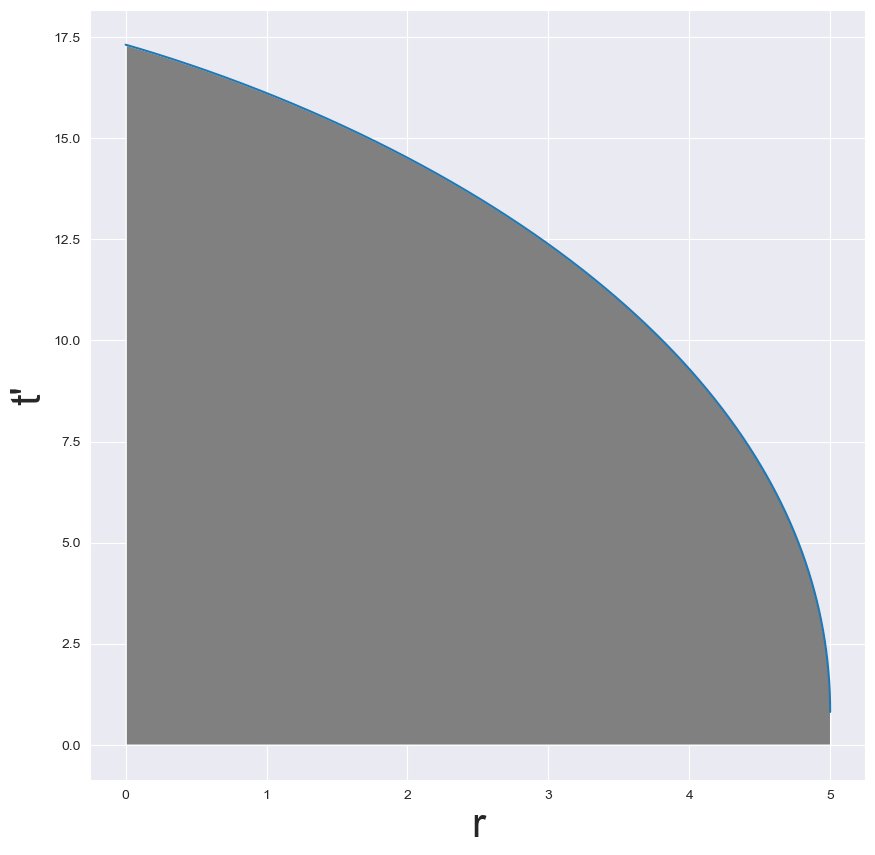

In [19]:
plt.figure(figsize = (10,10))
plt.fill_between(R, V - R, where=R>0, facecolor='grey')
plt.plot(R,V - R)
plt.xlabel("r", fontsize = 30)
plt.ylabel("temps de Finkelstein", fontsize = 30)
plt.ylabel("t'")

## Tracé des cônes de lumière

Pour trouver la forme des cônes de lumières, il faut résoudre l'équation $ds^2 = 0$ pour trouver les trajectoires "lightlikes", méthode différente que pour une particule de masse non nulle. En coordonnée d'Eddington-Finkelstein, l'équation à résoudre est donc : 
$$
\frac{d\tilde{V}}{dr} = 0
$$
pour la première tangente du cône, et
$$
\frac{d\tilde{V}}{dr} = \frac{2}{1 - 2M/r}
$$
pour la seconde. La résolution est particulièrement simple pour la première équation, la trajectoire du photon se résumant alors à $\tilde{V} = cte$. Pour la seconde trajectoire, il suffit de résoudre l'équation différentielle avec la position de la particule à la surface de l'étoile à l'instant t comme condition intiale. 

On utilisera le solveur d'équation différentielle $DOP853$, qui est une méthode de Runge-Kutta explicite d'ordre 8.

In [20]:
def cone_lumiere(t, r):
  f = 2*t/(t - 2*M)
  return f

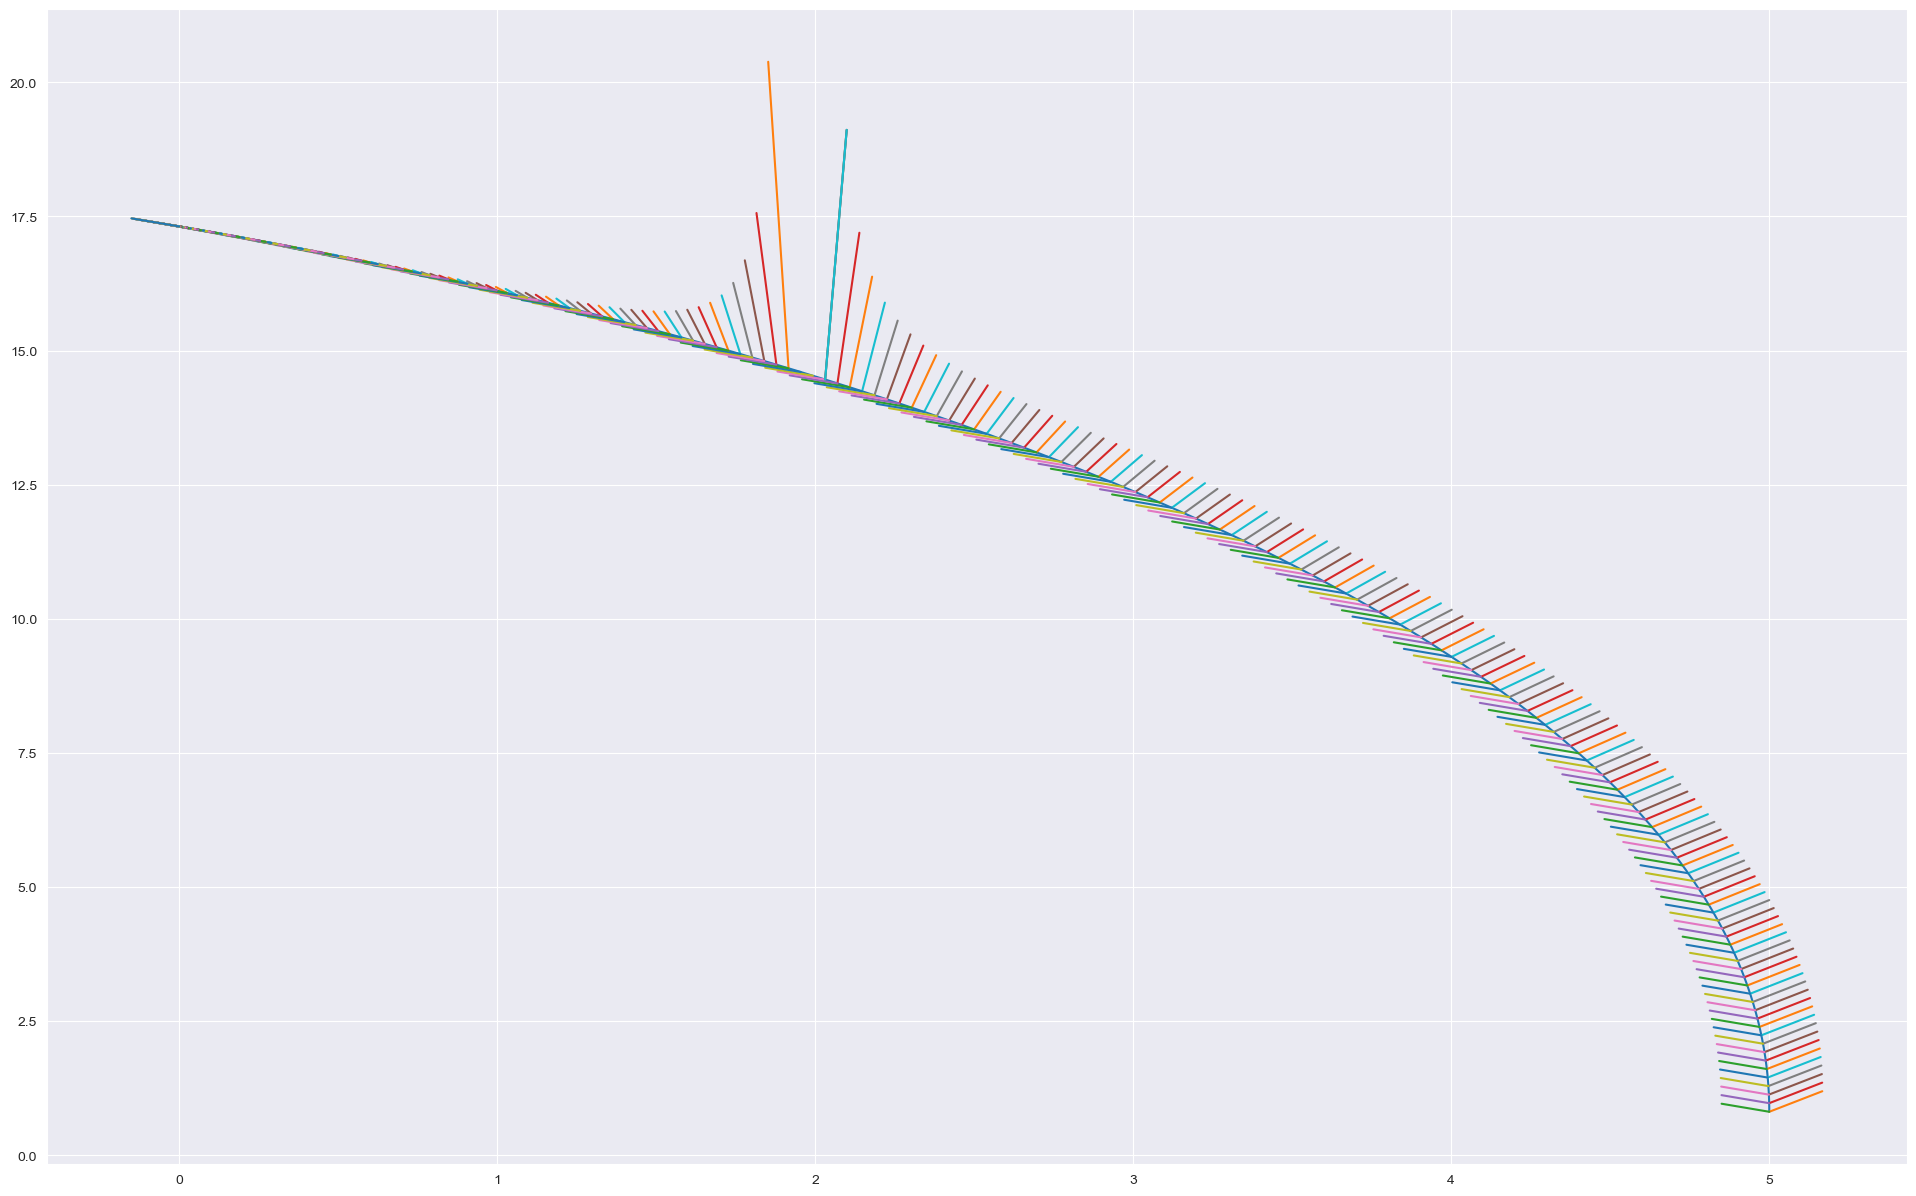

In [21]:
plt.figure(figsize = (15*1.6,15))
plt.plot(R,V - R)
plt.rcParams["figure.figsize"] = (40, 20)
nb_cone = 200
lg_cone = 10
cone_t_m = np.empty(lg_cone)
R_cone_m = np.empty(lg_cone)
R_cone_p = np.empty(lg_cone)
max = np.max(t)
#Tracé des cones de lumières
for j in range(nb_cone):
  Rin = R[m[j]] #Rayon initial
  Vin = V[m[j]] #temps initial
  y0 = np.array([Vin])
  t=[Rin - i/300*Rin for i in range(lg_cone, 0, -1)]
  cone_t_m[0] = Vin - R[m[j]]
  R_cone_p[0] = Rin
  R_cone_m[0] = Rin
  for i in range(1,lg_cone):
    r_m = Rin - i/300*Ri #on diminue r
    r_p = Rin + i/300*Ri #on augmente r
    R_cone_m[i] = r_m #On diminue r
    cone_t_m[i] = Vin - R[m[j]] + i/300*Ri #géodésique ingoing
  if (((Rin + Rin*lg_cone/300 > 2*M) and (Rin < 2*M)) == False): #On ne veut pas être prêt de la singularité en r = 2M
    if (Rin < 2*M):
      V_p = solve_ivp(cone_lumiere, [Rin, Rin + Rin*lg_cone/300], y0, method = "DOP853")#géodésique outgoing
      cone_t_p = 2*(Vin - Rin) - (V_p.y[0] - V_p.t)
      R_p = 2*Rin - V_p.t
    else:
      V_p = solve_ivp(cone_lumiere, [Rin, Rin + Rin*lg_cone/300], y0, method = "DOP853")#géodésique outgoing
      cone_t_p = V_p.y[0] - V_p.t
      R_p = V_p.t
  plt.plot(R_p, cone_t_p)
  plt.plot(R_cone_m, cone_t_m)

## Tracé de la trajectoire en coordonnée de Kruskal-Szekeres

Les coordonnée d'Eddington-Finkelstein bien qu'intéressante car ne font pas apparaître de singularité explicitement, présente tout de même certaine pathologie. Notamment en ce qui concerne le système de coordonnée choisis, que ce soit avec les coordonnées ($\tilde{V}$,r) (ingoing, ou coordonnée de type temps) ou ($\tilde{U}$,r)(outgoing, ou coordonnée de type espace). En effet, dans le système ($\tilde{V}$,r), les trajectoires sortantes (non réalisable physiquement) présentent le même défaut qu'en coordonnée de Schwarzild, la trajectoire ne peut tout simplement pas recouvrir l'espace-temps dans son ensemble. Les trajectoires dites entrantes peuvent, celles qui nous intéresse en pratique, d'où l'intérêt de ce système de coordonnée.  

Par une habile manipulation, on peut trouver un nouveau système de coordonnée qui tuera une bonne fois pour toute la singularité apparente. 
On utilisera le système suivant : $u = \sqrt{(\frac{r}{2M} - 1)}\exp{\frac{r}{4M}}\cosh{\frac{t}{4M}}$, $v = \sqrt{(\frac{r}{2M} - 1)}\exp{\frac{r}{4M}}\sinh{\frac{t}{4M}}$ pour $r > 2M$, et $u = \sqrt{(1 - \frac{r}{2M})}\exp{\frac{r}{4M}}\sinh{\frac{t}{4M}}$, $v = \sqrt{(1 - \frac{r}{2M})}\exp{\frac{r}{4M}}\cosh{\frac{t}{4M}}$ pour $r < 2M$. 

Dans les coordonnées de Kruskal-Szekeres, l'élement de longueur d'espace-temps prend la forme: $ds^2 = -\frac{32M^3}{r}\exp{-\frac{r}{2M}}(dv^2 - du^2) + r^2d\Omega^2$

Le cône de lumière 'radiale' est particulièrement simple à dessiner dans ce cas, il suffit d'avoir $dv = \pm du$.

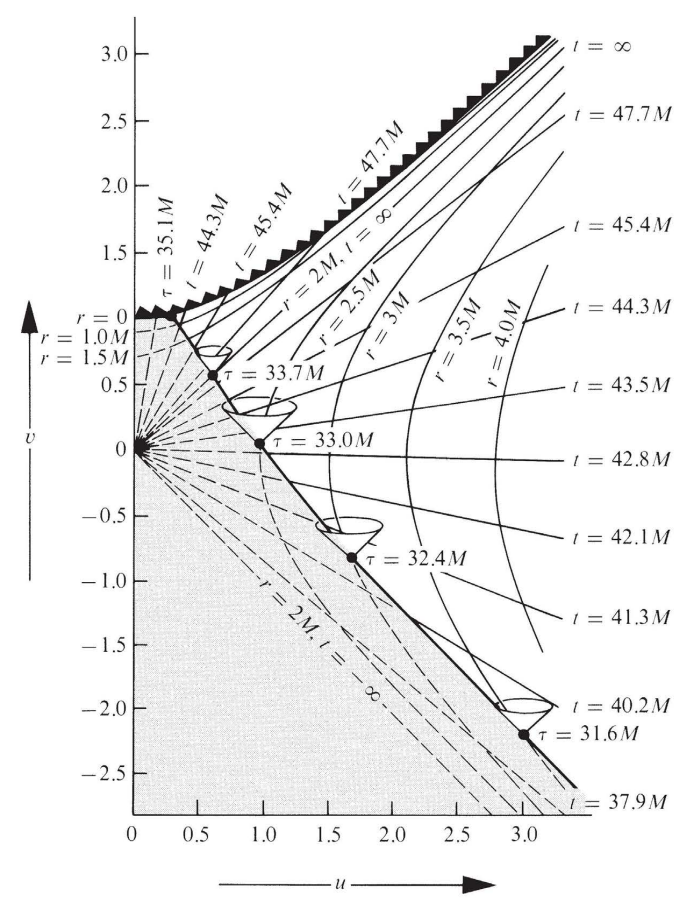

In [22]:
def u_ext(r,t):
  u = (r/(2*M) - 1)*np.exp(r/(4*M))*np.cosh(t/(4*M))
  return u

def v_ext(r,t):
  v = (r/(2*M) - 1)*np.exp(r/(4*M))*np.sinh(t/(4*M))
  return v                                                                

def u_int(r,t):
  u = (-r/(2*M) + 1)*np.exp(r/(4*M))*np.sinh(t/(4*M))
  return u

def v_int(r,t):
  v = ( - r/(2*M) + 1)*np.exp(r/(4*M))*np.cosh(t/(4*M))
  return v

In [23]:
N = 10001
M = 1
eta=[pi*i/10000 for i in range(N)]
Ri = 5
R_p = []
R_m = []
t_p = []
t_m = []
R = 0
t = 0
for i in range(N):
  R = Ri/2*(1+np.cos(eta[i]))
  t = 2*M*np.log(np.abs(np.sqrt(Ri/(2*M) - 1) + np.tan(eta[i]/2))/np.abs(np.sqrt(Ri/(2*M) - 1) - np.tan(eta[i]/2))) + 2*M*np.sqrt(Ri/(2*M) - 1)*(eta[i] + Ri/(4*M)*(eta[i] + np.sin(eta[i])))
  if (R > 2*M):
    R_p.append(R)
    t_p.append(t)
  else:
    R_m.append(R)
    t_m.append(t)

In [24]:
u = np.linspace(0,10,N)
v = [np.sqrt(u[i]**2 + 1) for i in range(N)]
u_infall_ext = [u_ext(R_p[i],t_p[i]) for i in range(len(R_p))]
u_infall_int = [u_int(R_m[i],t_m[i]) for i in range(len(R_m))]
v_infall_ext = [v_ext(R_p[i],t_p[i]) for i in range(len(R_p))]
v_infall_int = [v_int(R_m[i],t_m[i]) for i in range(len(R_m))]

Je n'ai pas réussi, je n'obtiens pas la bonne géodésique.

Text(0, 0.5, 'v')

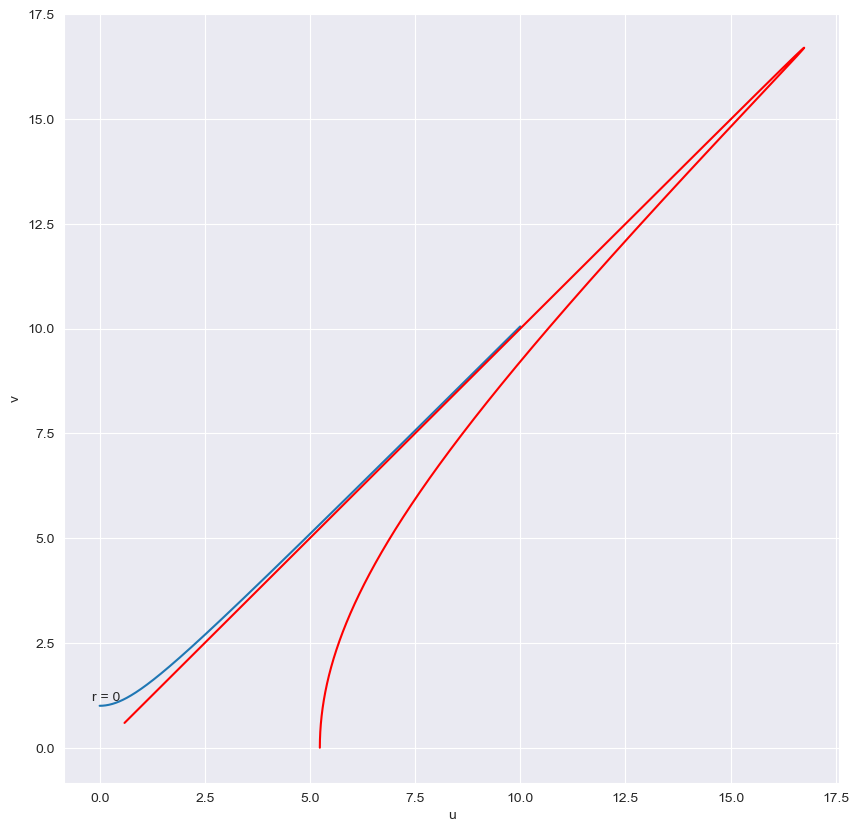

In [25]:
plt.figure(figsize = (10,10))
plt.text(0.15, 1.2, 'r = 0', horizontalalignment='center', verticalalignment='center')
plt.plot(u,v)
plt.plot(u_infall_ext, v_infall_ext, color = 'r')                                            
#plt.plot(u_infall_int, v_infall_int, color = 'g')
plt.xlabel('u')
plt.ylabel('v')

## Redshift

On cherche à évaluer le décalage vers le rouge que subit un signal émis depuis la surface de l'étoile et reçu par un observateur à l'infini. On peut penser à deux phénomènes: l'effet Einstein et l'effet Doppler relativiste.

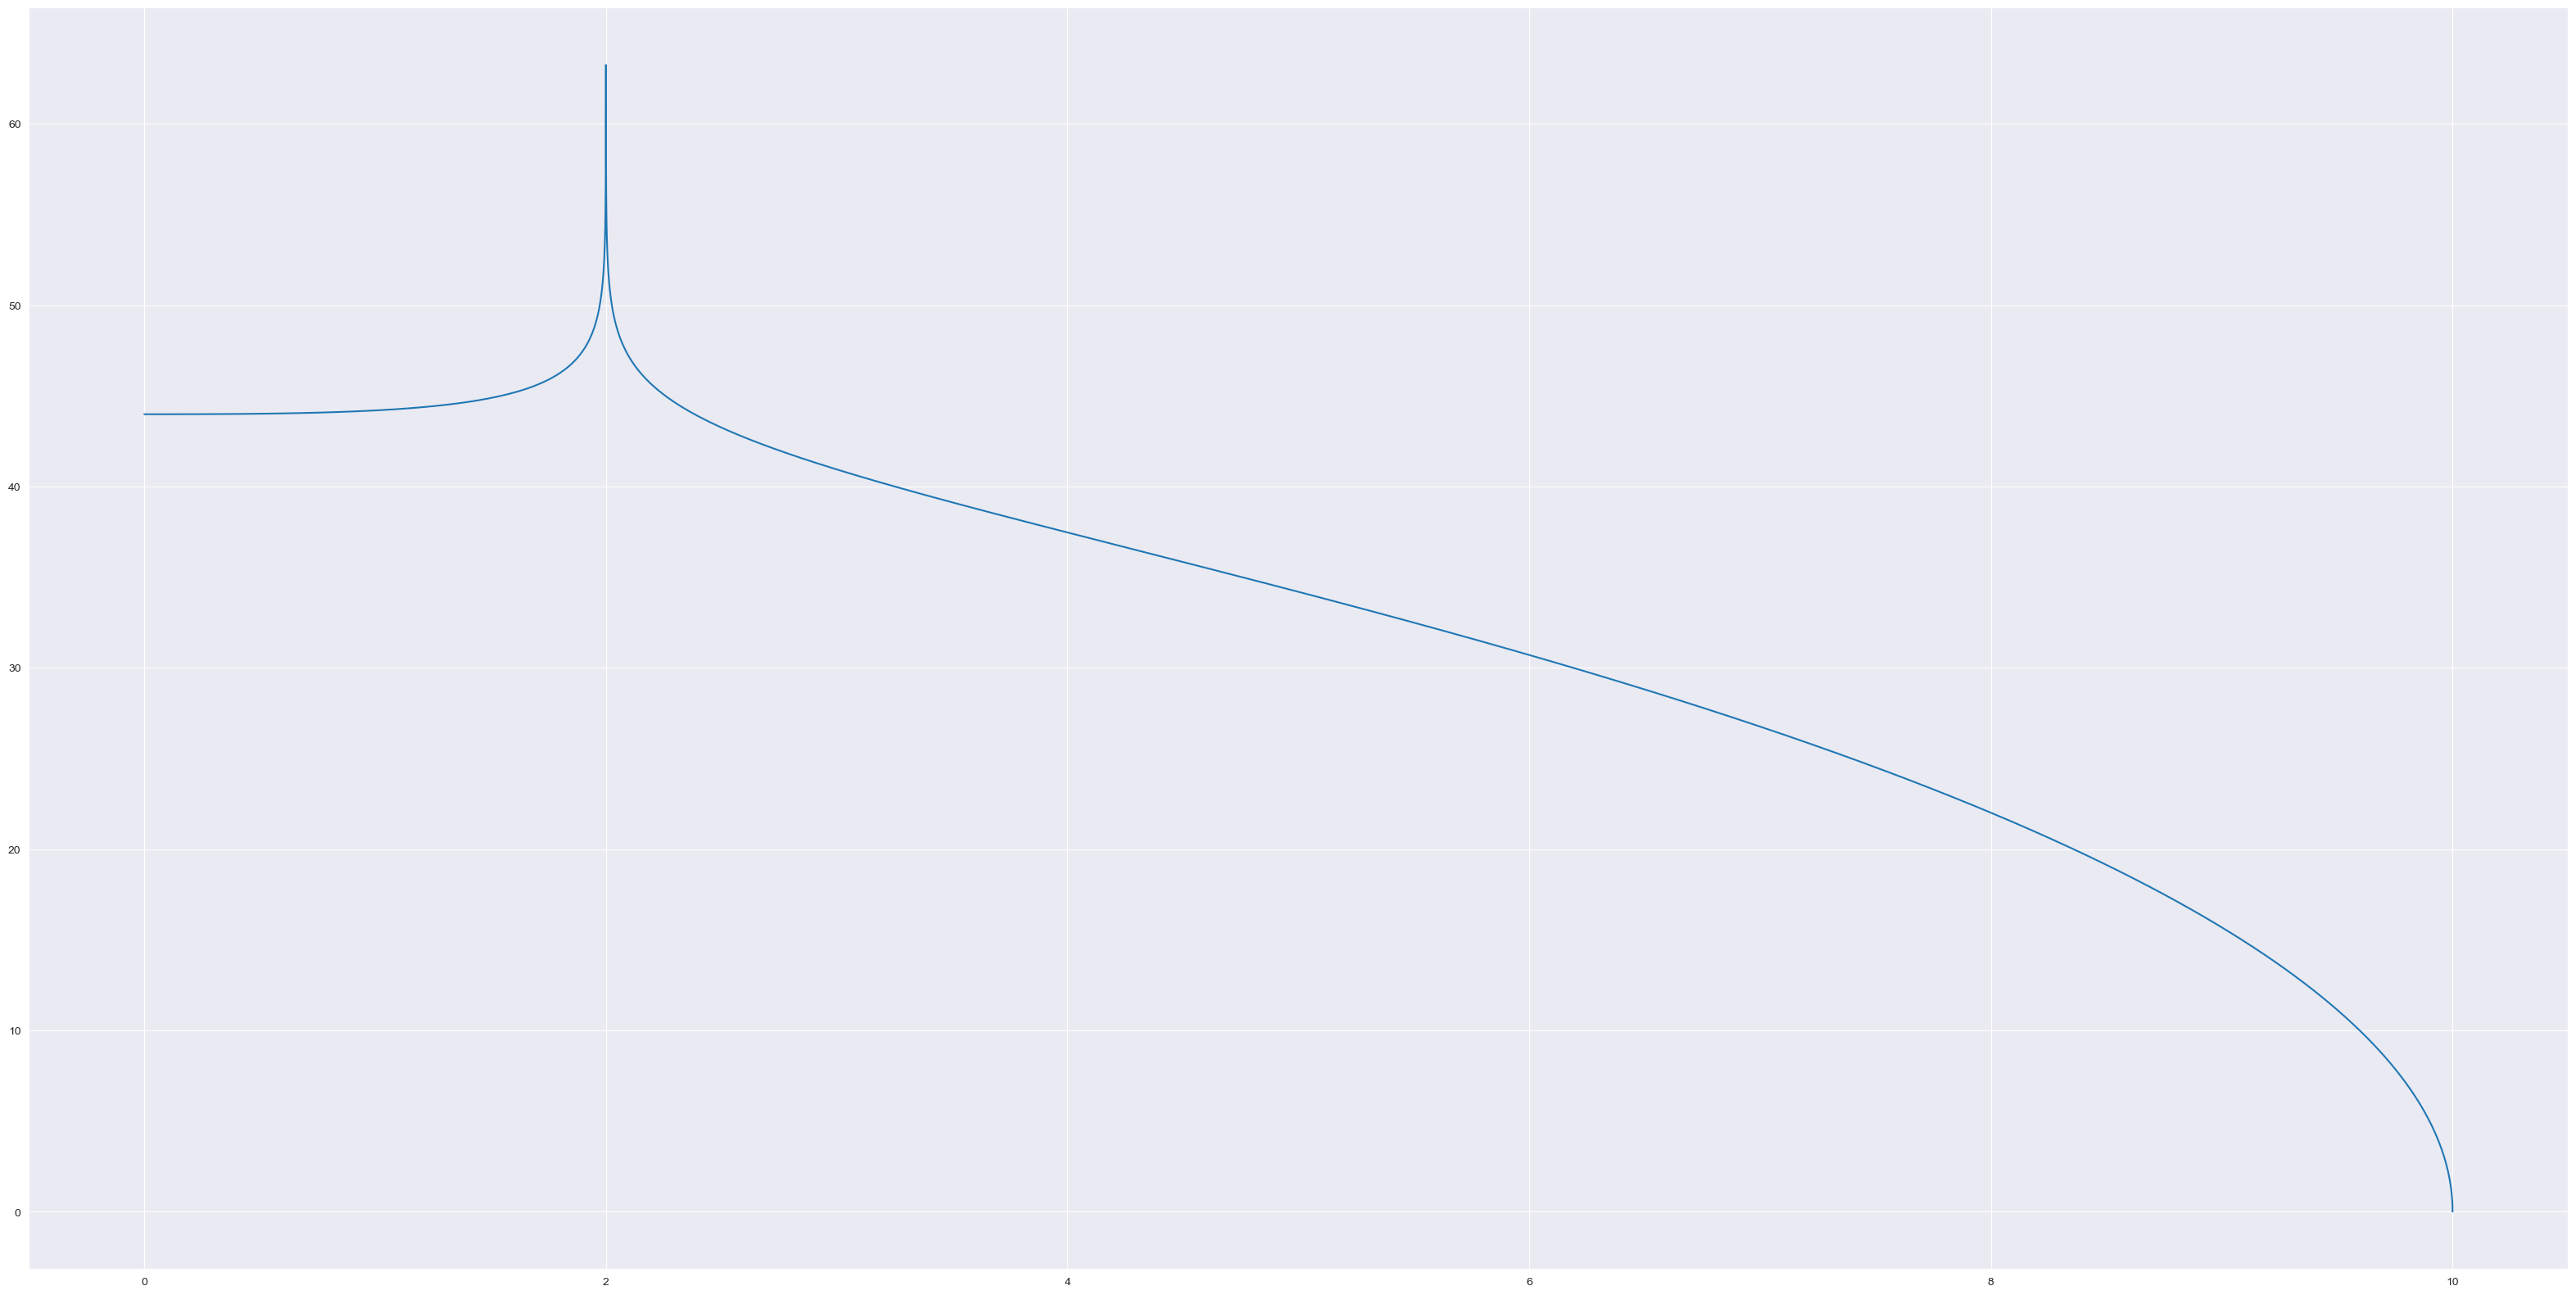

In [26]:
#On repasse en coordonnée de Schwarzschild
M=1
N = 100001
eta=[pi*i/100000 for i in range(N)]
R = []                                                                
Ri = 10
t = []

for i in range(N):
  R.append(Ri/2*(1+cos(eta[i])))
  t.append( 2*M*log(abs(sqrt(Ri/(2*M) - 1) + tan(eta[i]/2))/abs(sqrt(Ri/(2*M) - 1) - tan(eta[i]/2))) + 2*M*sqrt(Ri/(2*M) - 1)*(eta[i] + Ri/(4*M)*(eta[i] + sin(eta[i]))))

lambda_emis=500
plt.plot(R,t)

L'effet Einstein est un redshift lié à la courbure de l'espace-temps:
 $-c^2d\tau^2 =-c^2(1-\frac{2GM}{rc^2})dt^2  $, et on a donc $dt=\frac{d\tau}{\sqrt{1-2GM/rc^2}}$ ce qui donne immédiatement en multipliant par c:  $\frac{\lambda_0}{\lambda_s}=\frac{1}{\sqrt{1-GM/rc^2}}$. Le redshift est alors donné par $z=\frac{\lambda_0-\lambda_s}{\lambda_s}$

(1.9, 5.0, -1.0, 50.0)

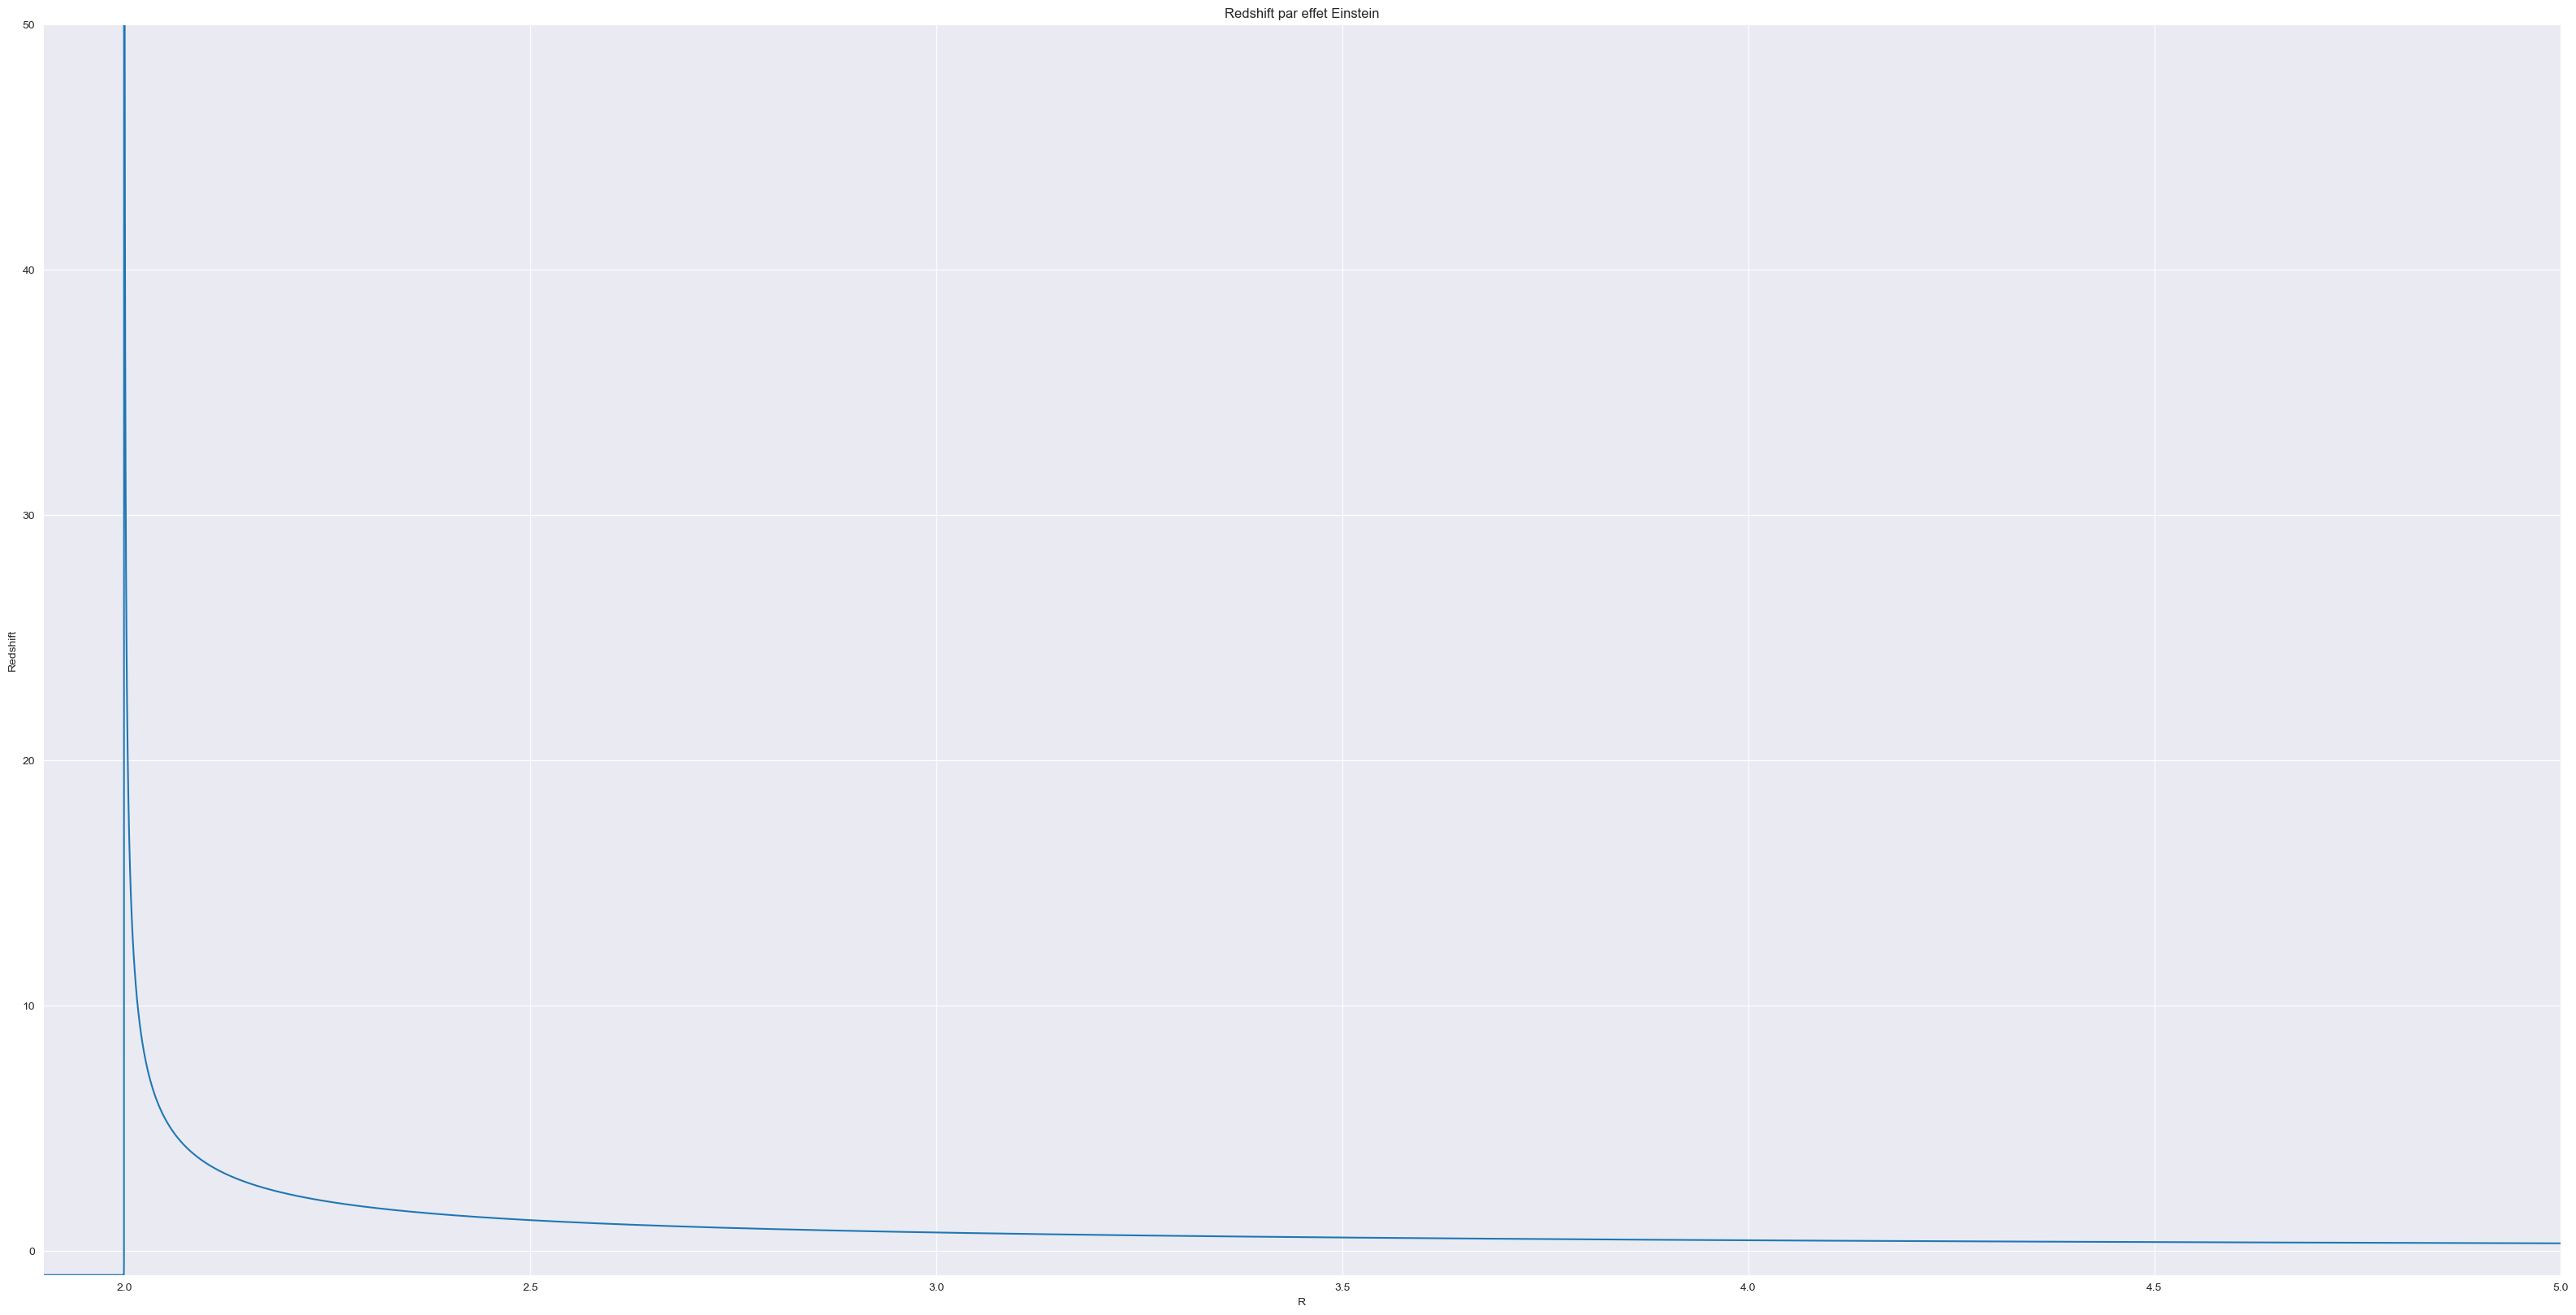

In [27]:
#Effet Einstein gravitationnel (cas statique)
Rs=2*M
Effet_Einstein=[]
for i in R:
  if i>Rs:
    a=(1-Rs/i)**(-1/2)*lambda_emis
  a=(a-lambda_emis)/lambda_emis
  Effet_Einstein.append(a)

plt.plot(R,Effet_Einstein)
plt.title("Redshift par effet Einstein")
plt.xlabel("R")
plt.ylabel("Redshift")
plt.axis([1.9,5,-1,50])

Text(0, 0.5, 'vitesse')

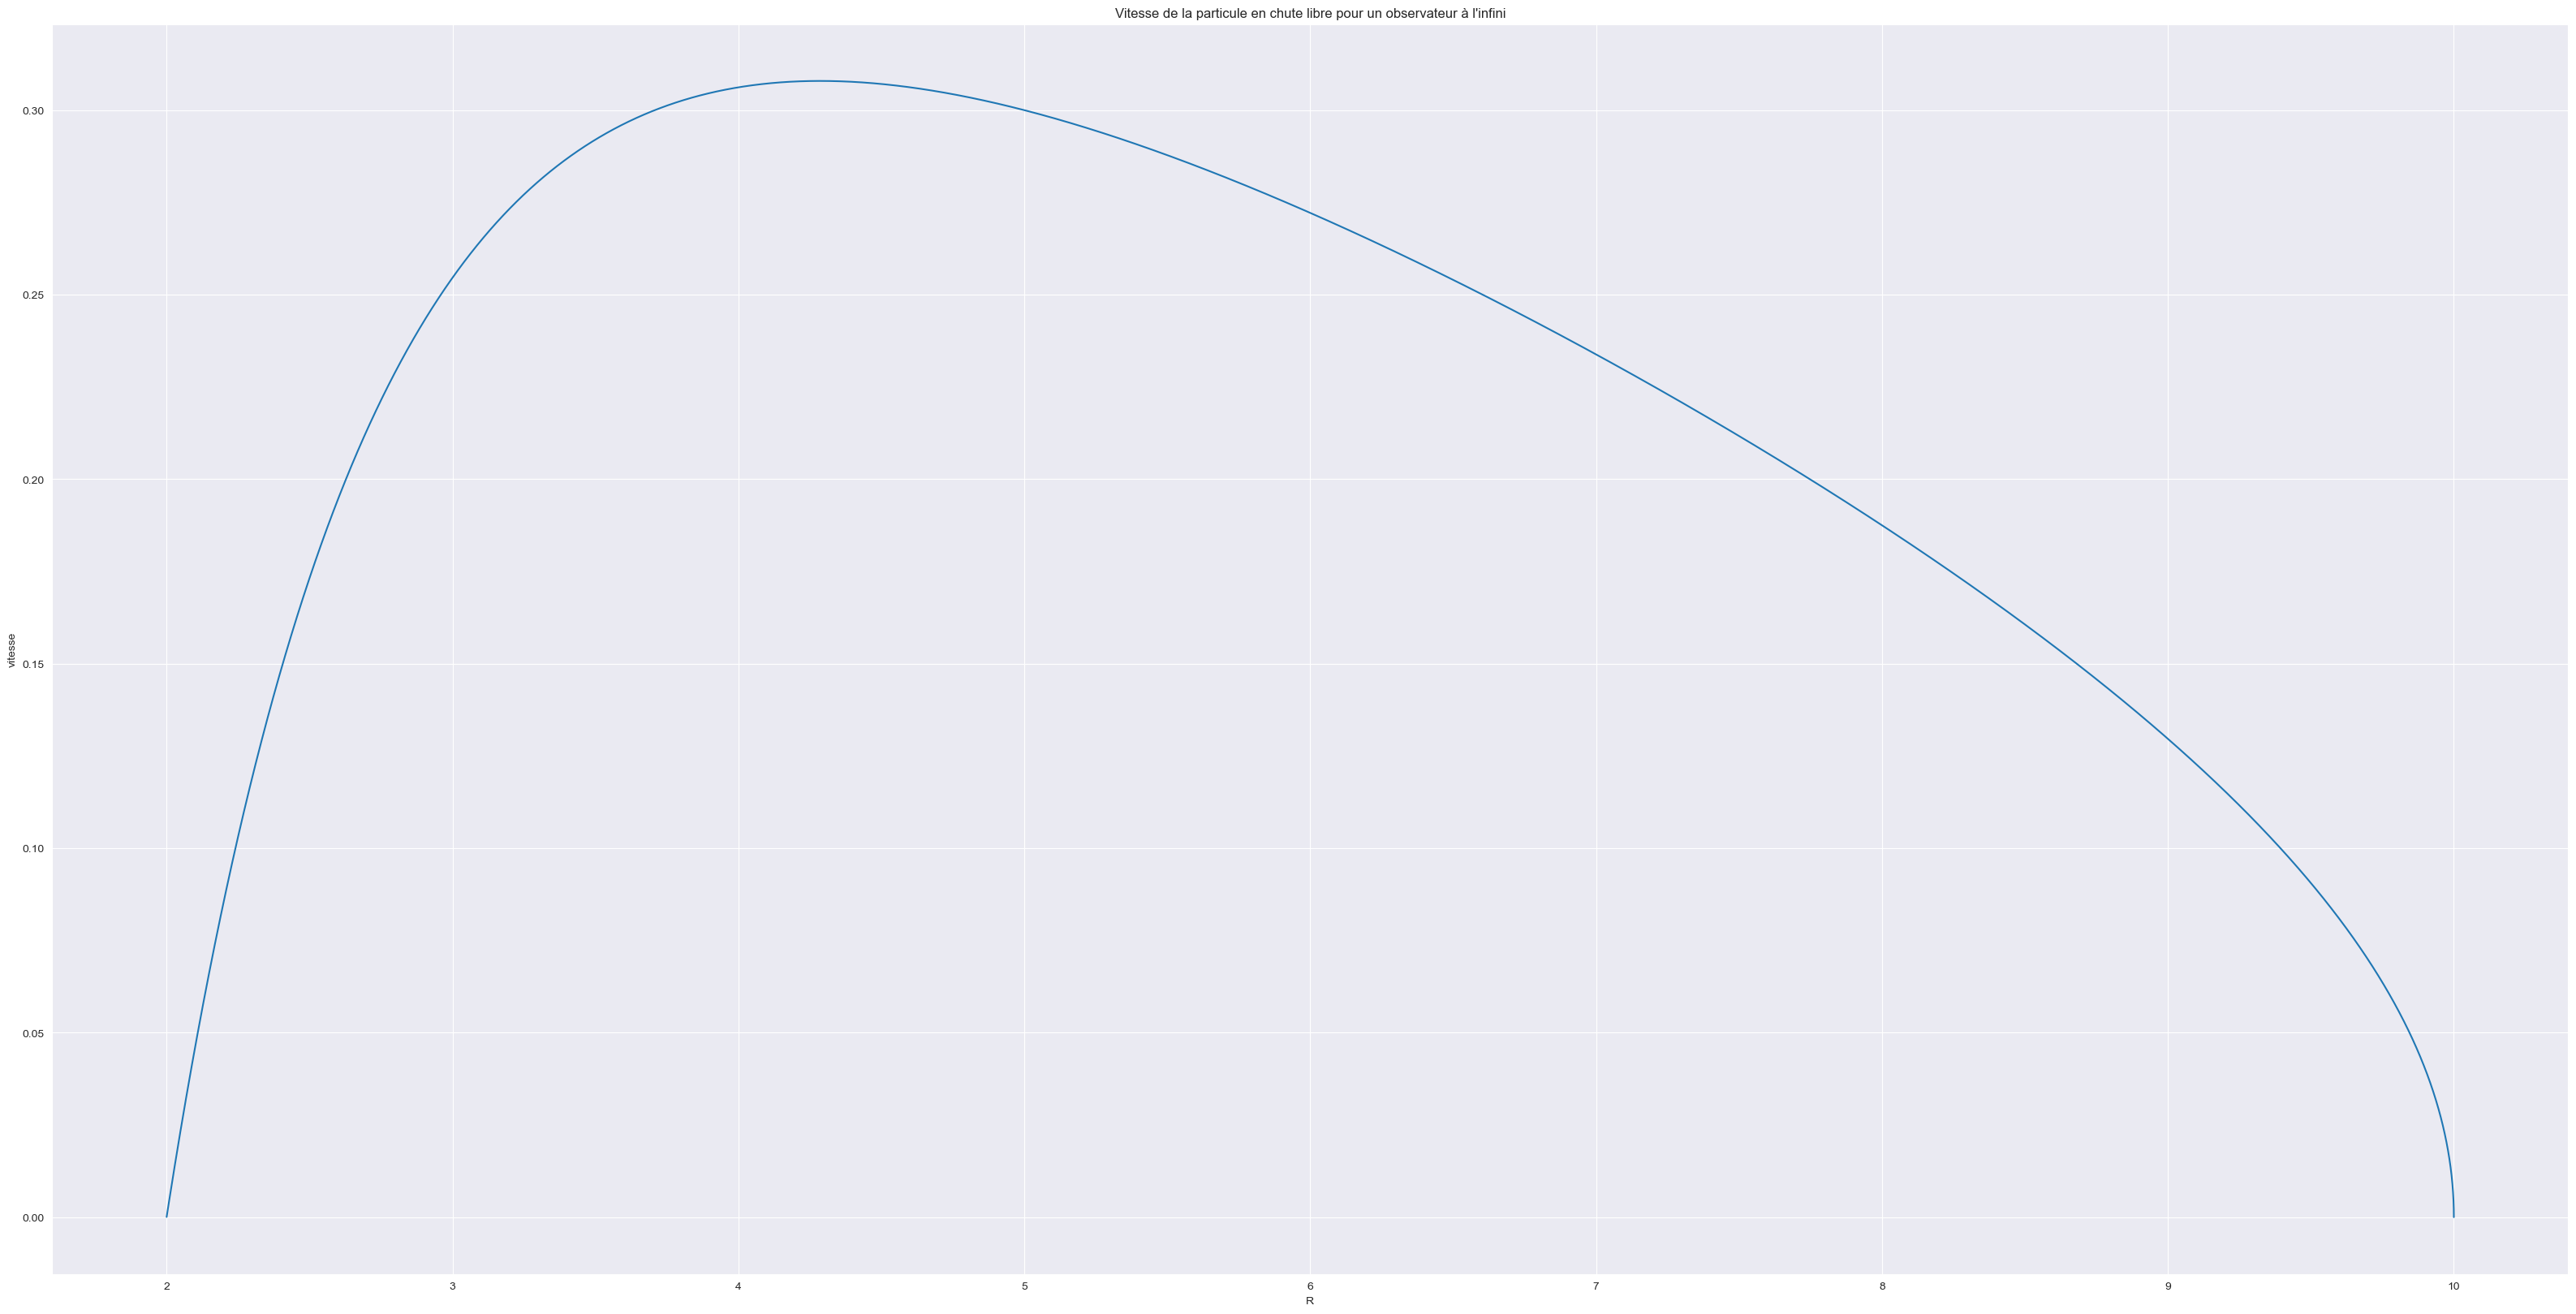

In [28]:
#Calcul de la vitesse au carré et redimensionnement de la liste R via la liste R_bis


v=[]
i=1

while(R[i+1]>2*M):
    a=abs((R[i+1]-R[i-1])/(t[i+1]-t[i-1]))
    v.append(a)
    i=i+1

R_bis=R[1:i]
t_bis=t[1:i]


plt.plot(R_bis,v)
plt.title("Vitesse de la particule en chute libre pour un observateur à l'infini")
plt.xlabel("R")
plt.ylabel("vitesse")




Text(0, 0.5, 'vitesse')

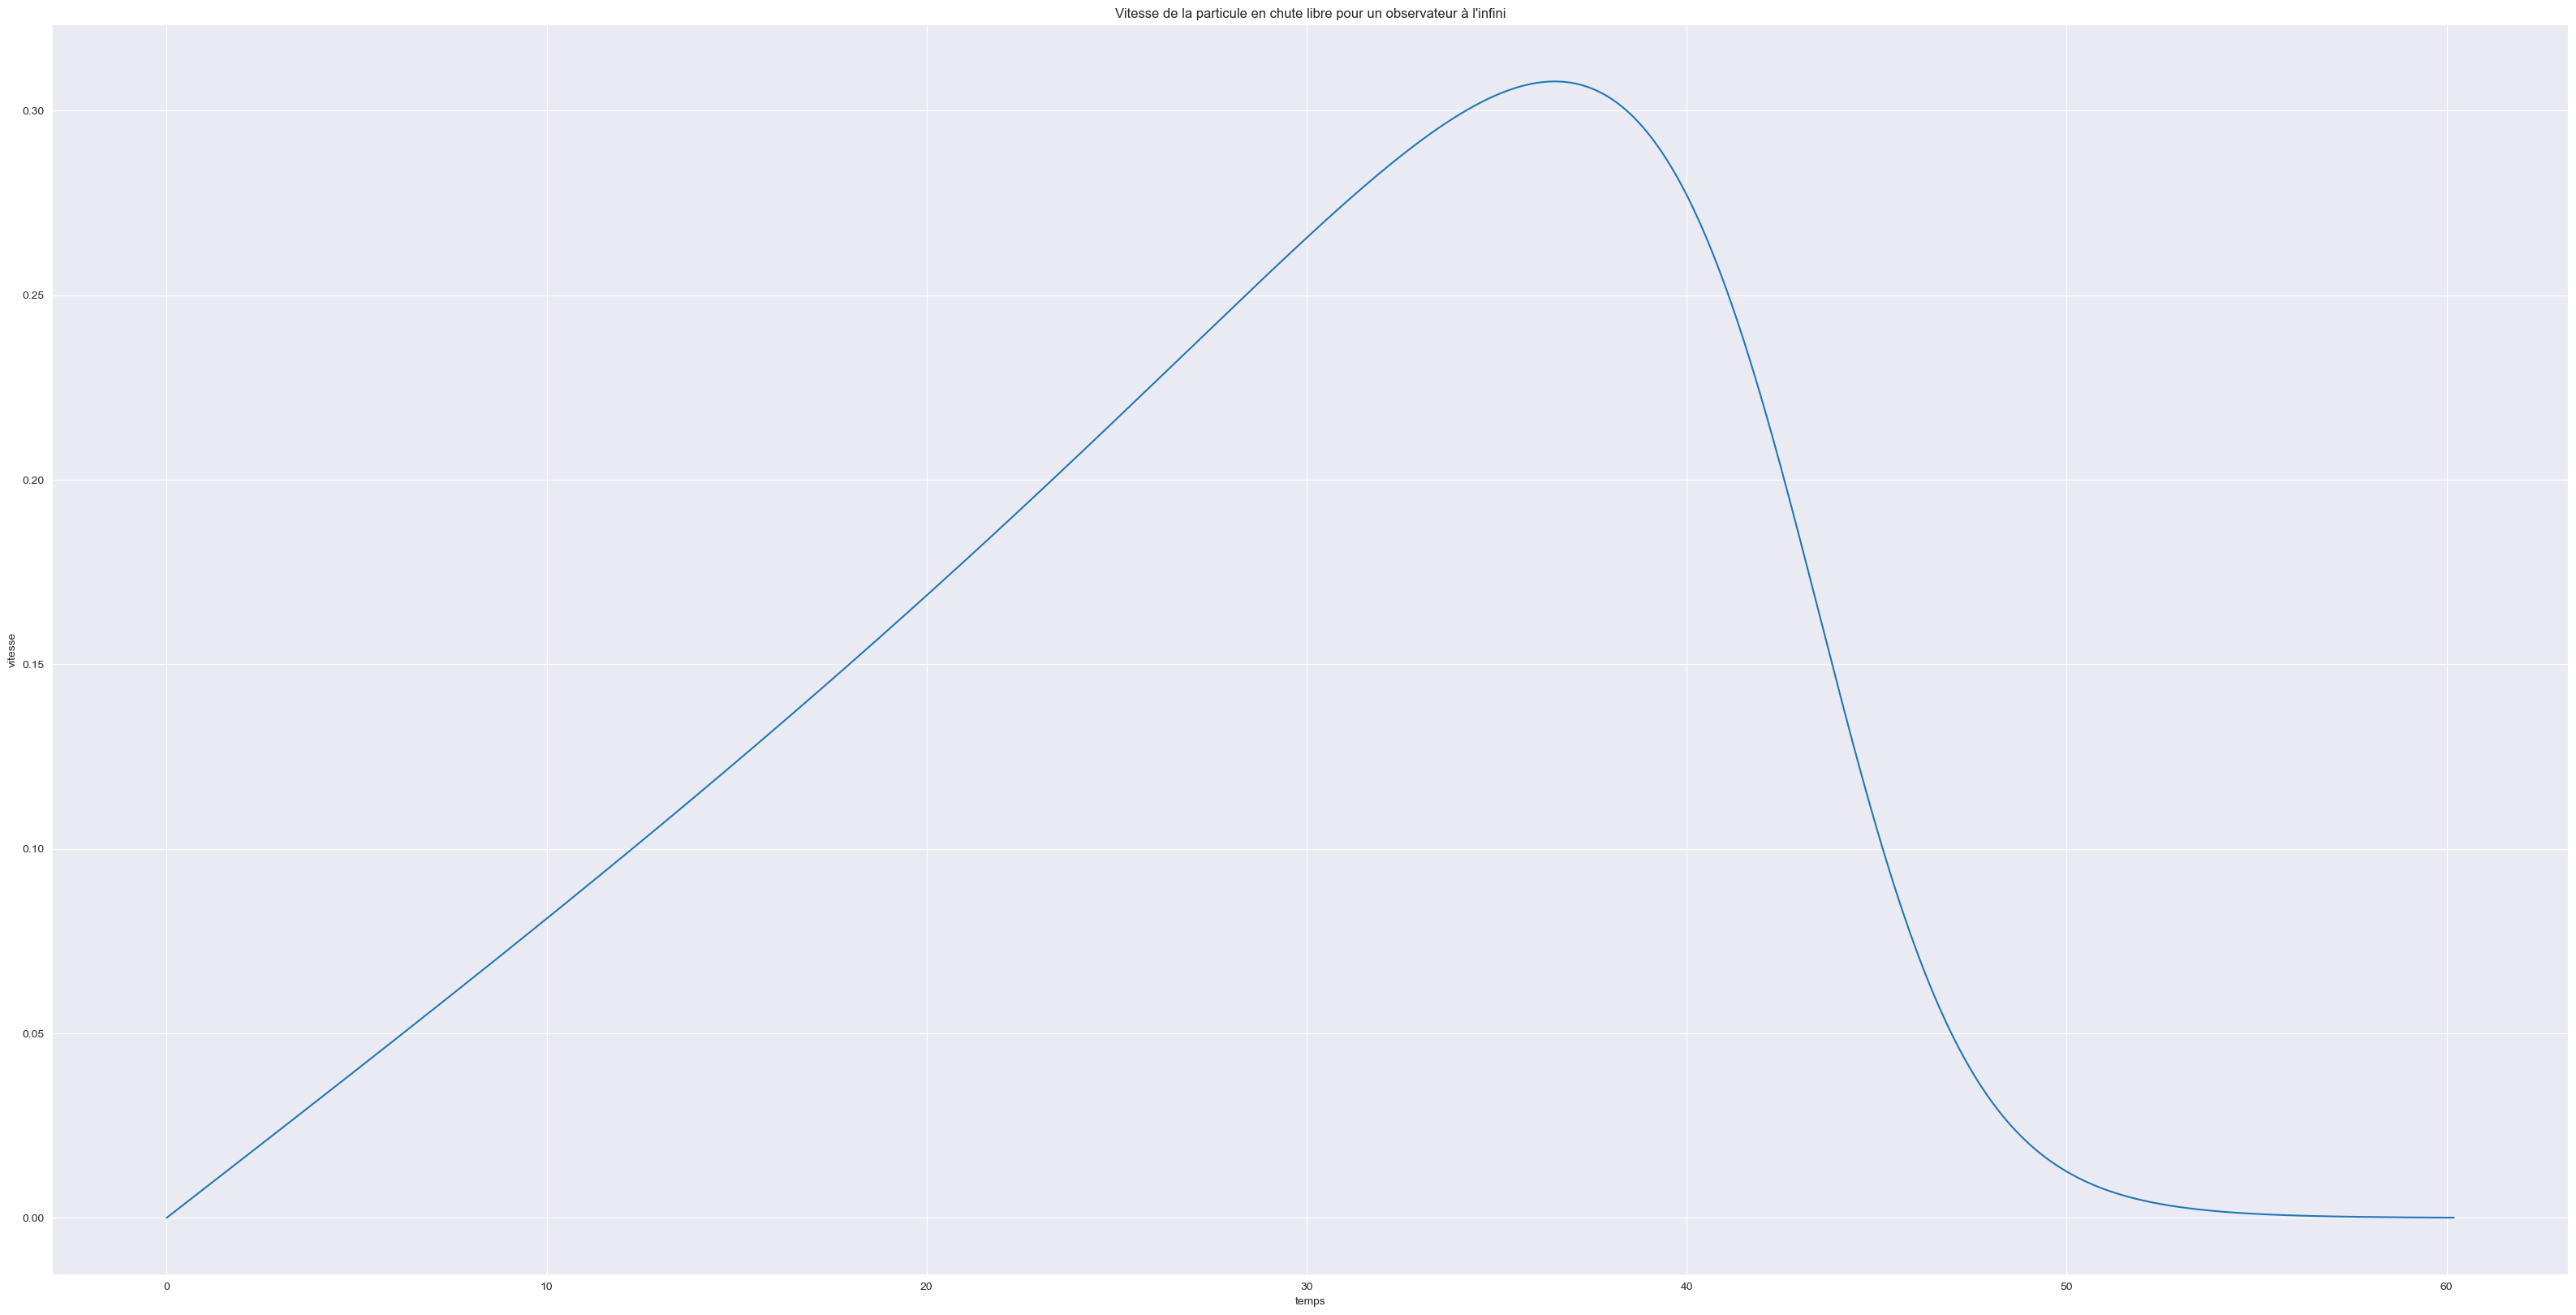

In [29]:
plt.plot(t_bis,v)
plt.title("Vitesse de la particule en chute libre pour un observateur à l'infini")
plt.xlabel("temps")
plt.ylabel("vitesse")

La surface est en mouvement, on peut donc également penser à l'effet Doppler relativite. En relativité restreinte (espace temps plat), l'effet Doppler est donné par $z=\sqrt{\frac{1+\beta}{1-\beta}}-1$ avec $\beta=\frac{v}{c}$

Text(0, 0.5, 'Redshift')

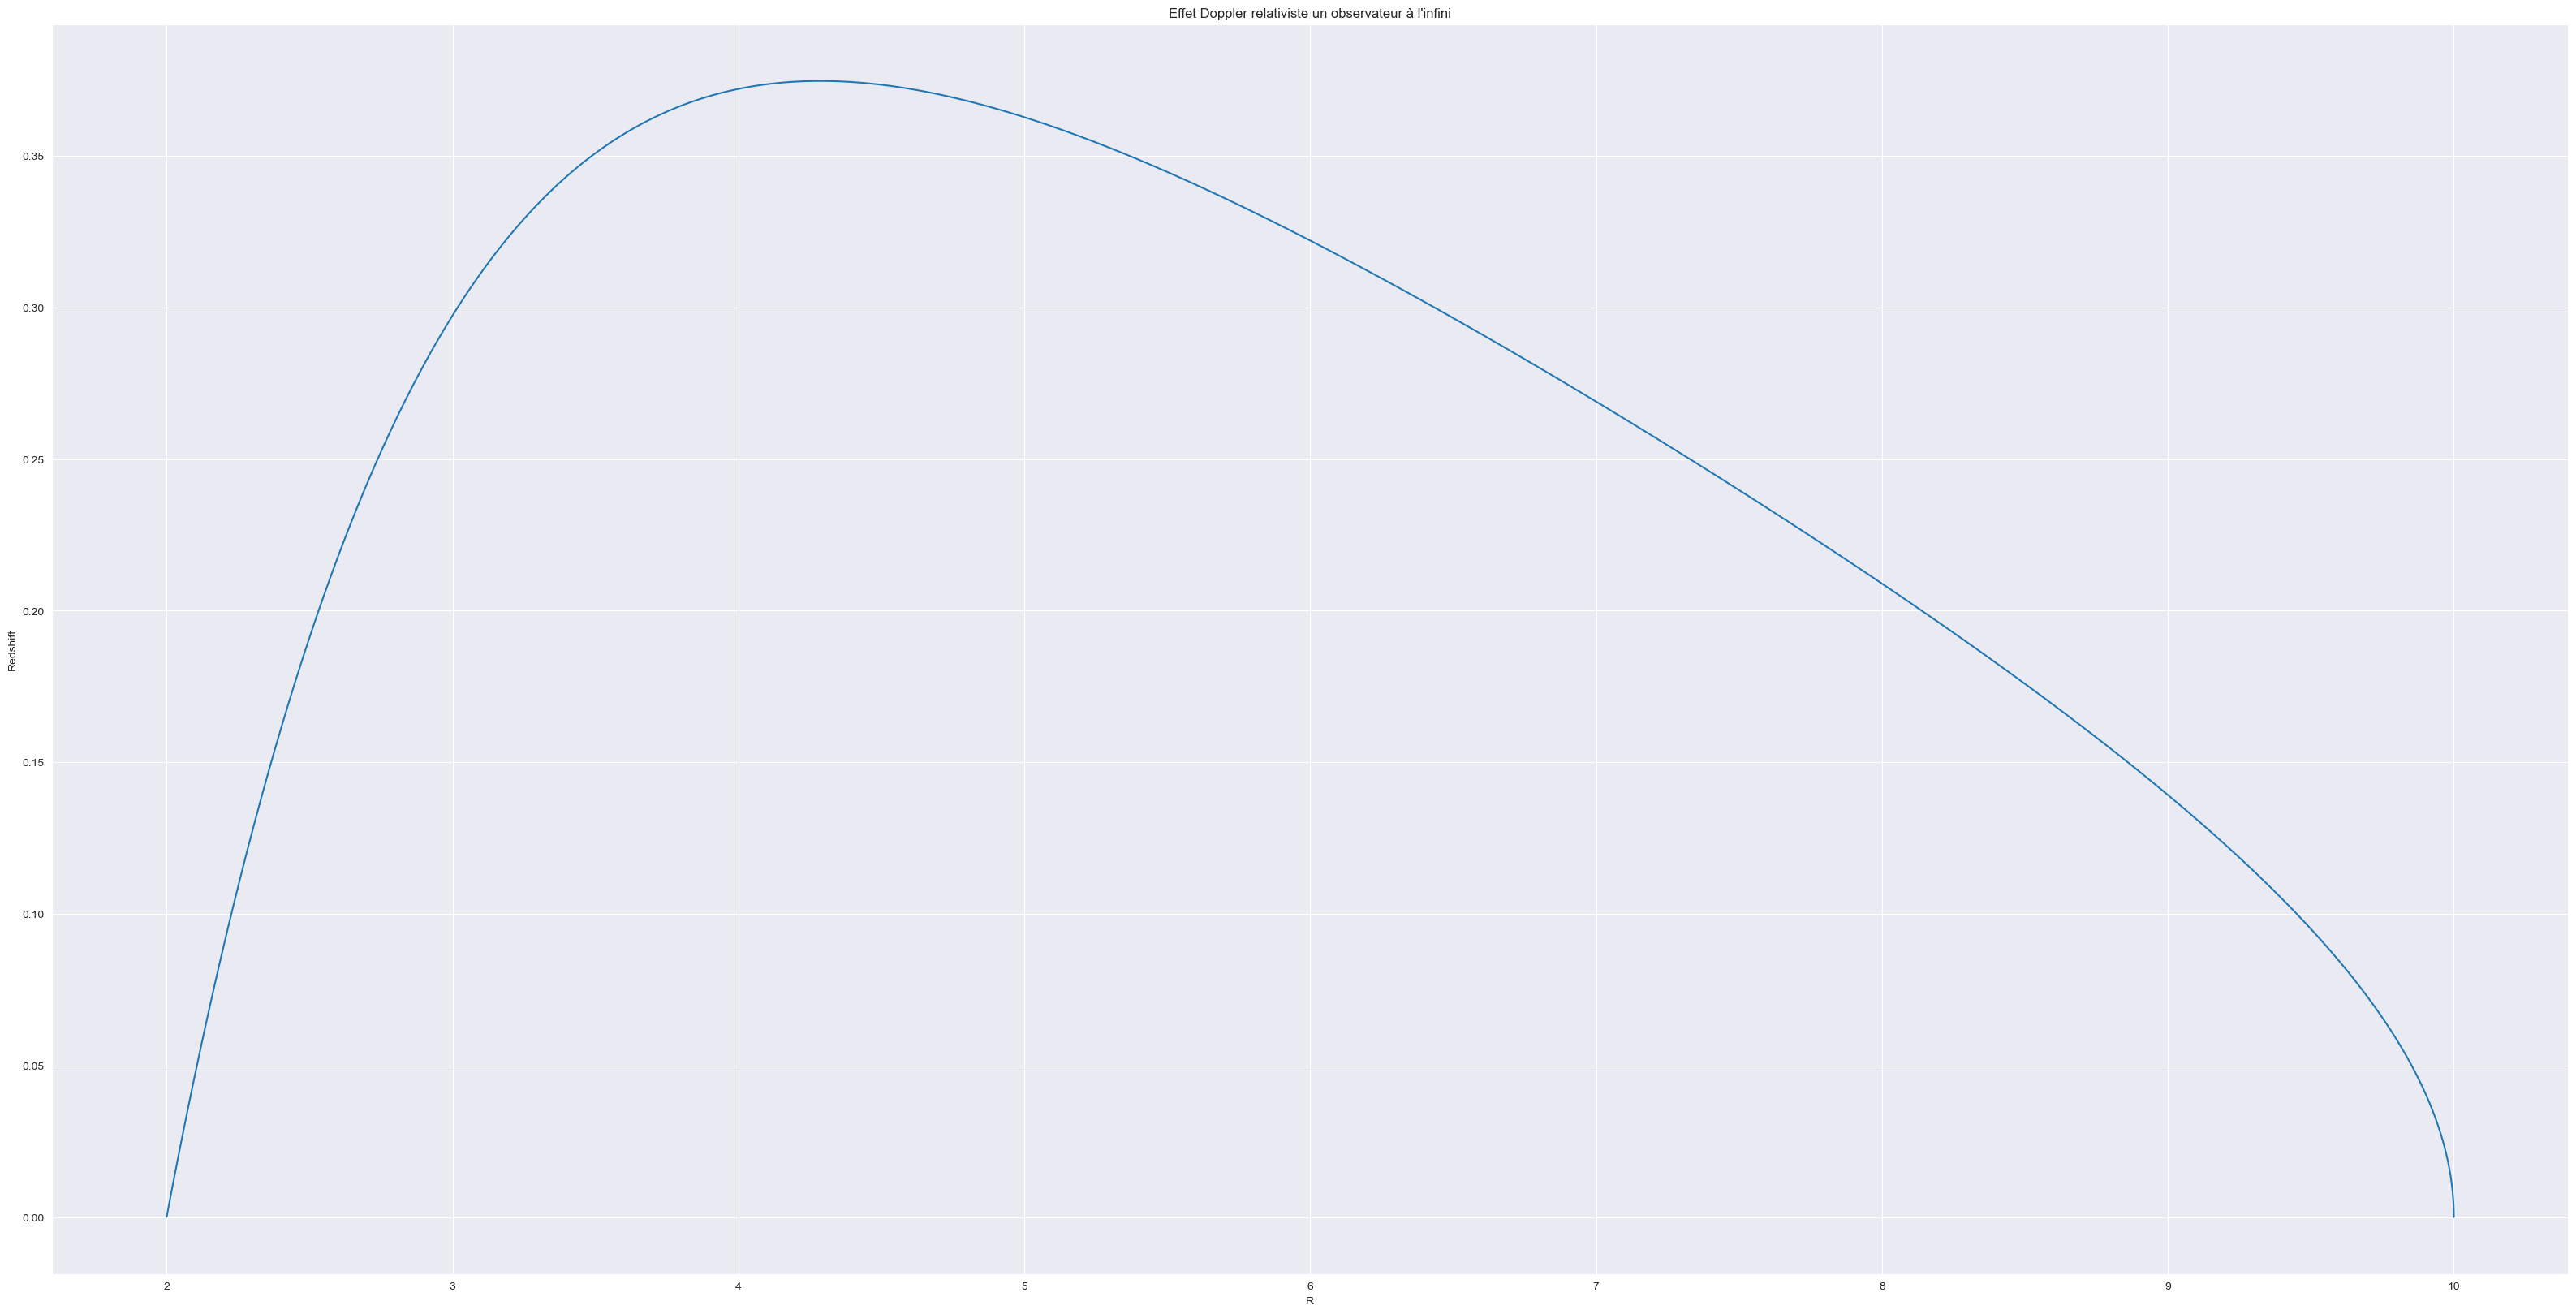

In [30]:
#Doppler en relativité restreinte
Doppler=[]

for i in v:

    b=sqrt((1+i)/(1-i))*lambda_emis
    b=(b-lambda_emis)/lambda_emis
    Doppler.append(b)

plt.plot(R_bis,Doppler)
plt.title("Effet Doppler relativiste un observateur à l'infini")
plt.xlabel("R")
plt.ylabel("Redshift")

Le redshift réel est il la somme des deux effet ? Pas exactement. On se place dans le cadre de la relativité générale et par égalité des intervalles:
$-c^2d\tau^2=-(1-2GM/rc^2)c^2dt^2+\frac{dr^2}{1-2GM/rc^2}$.
En posant $v=dr/dt$ la vitesse de la surface pour un observateur à l'infini, on a $\frac{\lambda_s}{\lambda_0}=\frac{c^2}{\sqrt{(1-2GM/rc^2)-v^2/(1-2GM/rc^2)}}$.\
On trace l'effet Einstein, l'effet Doppler et l'effet réel en relativité générale.

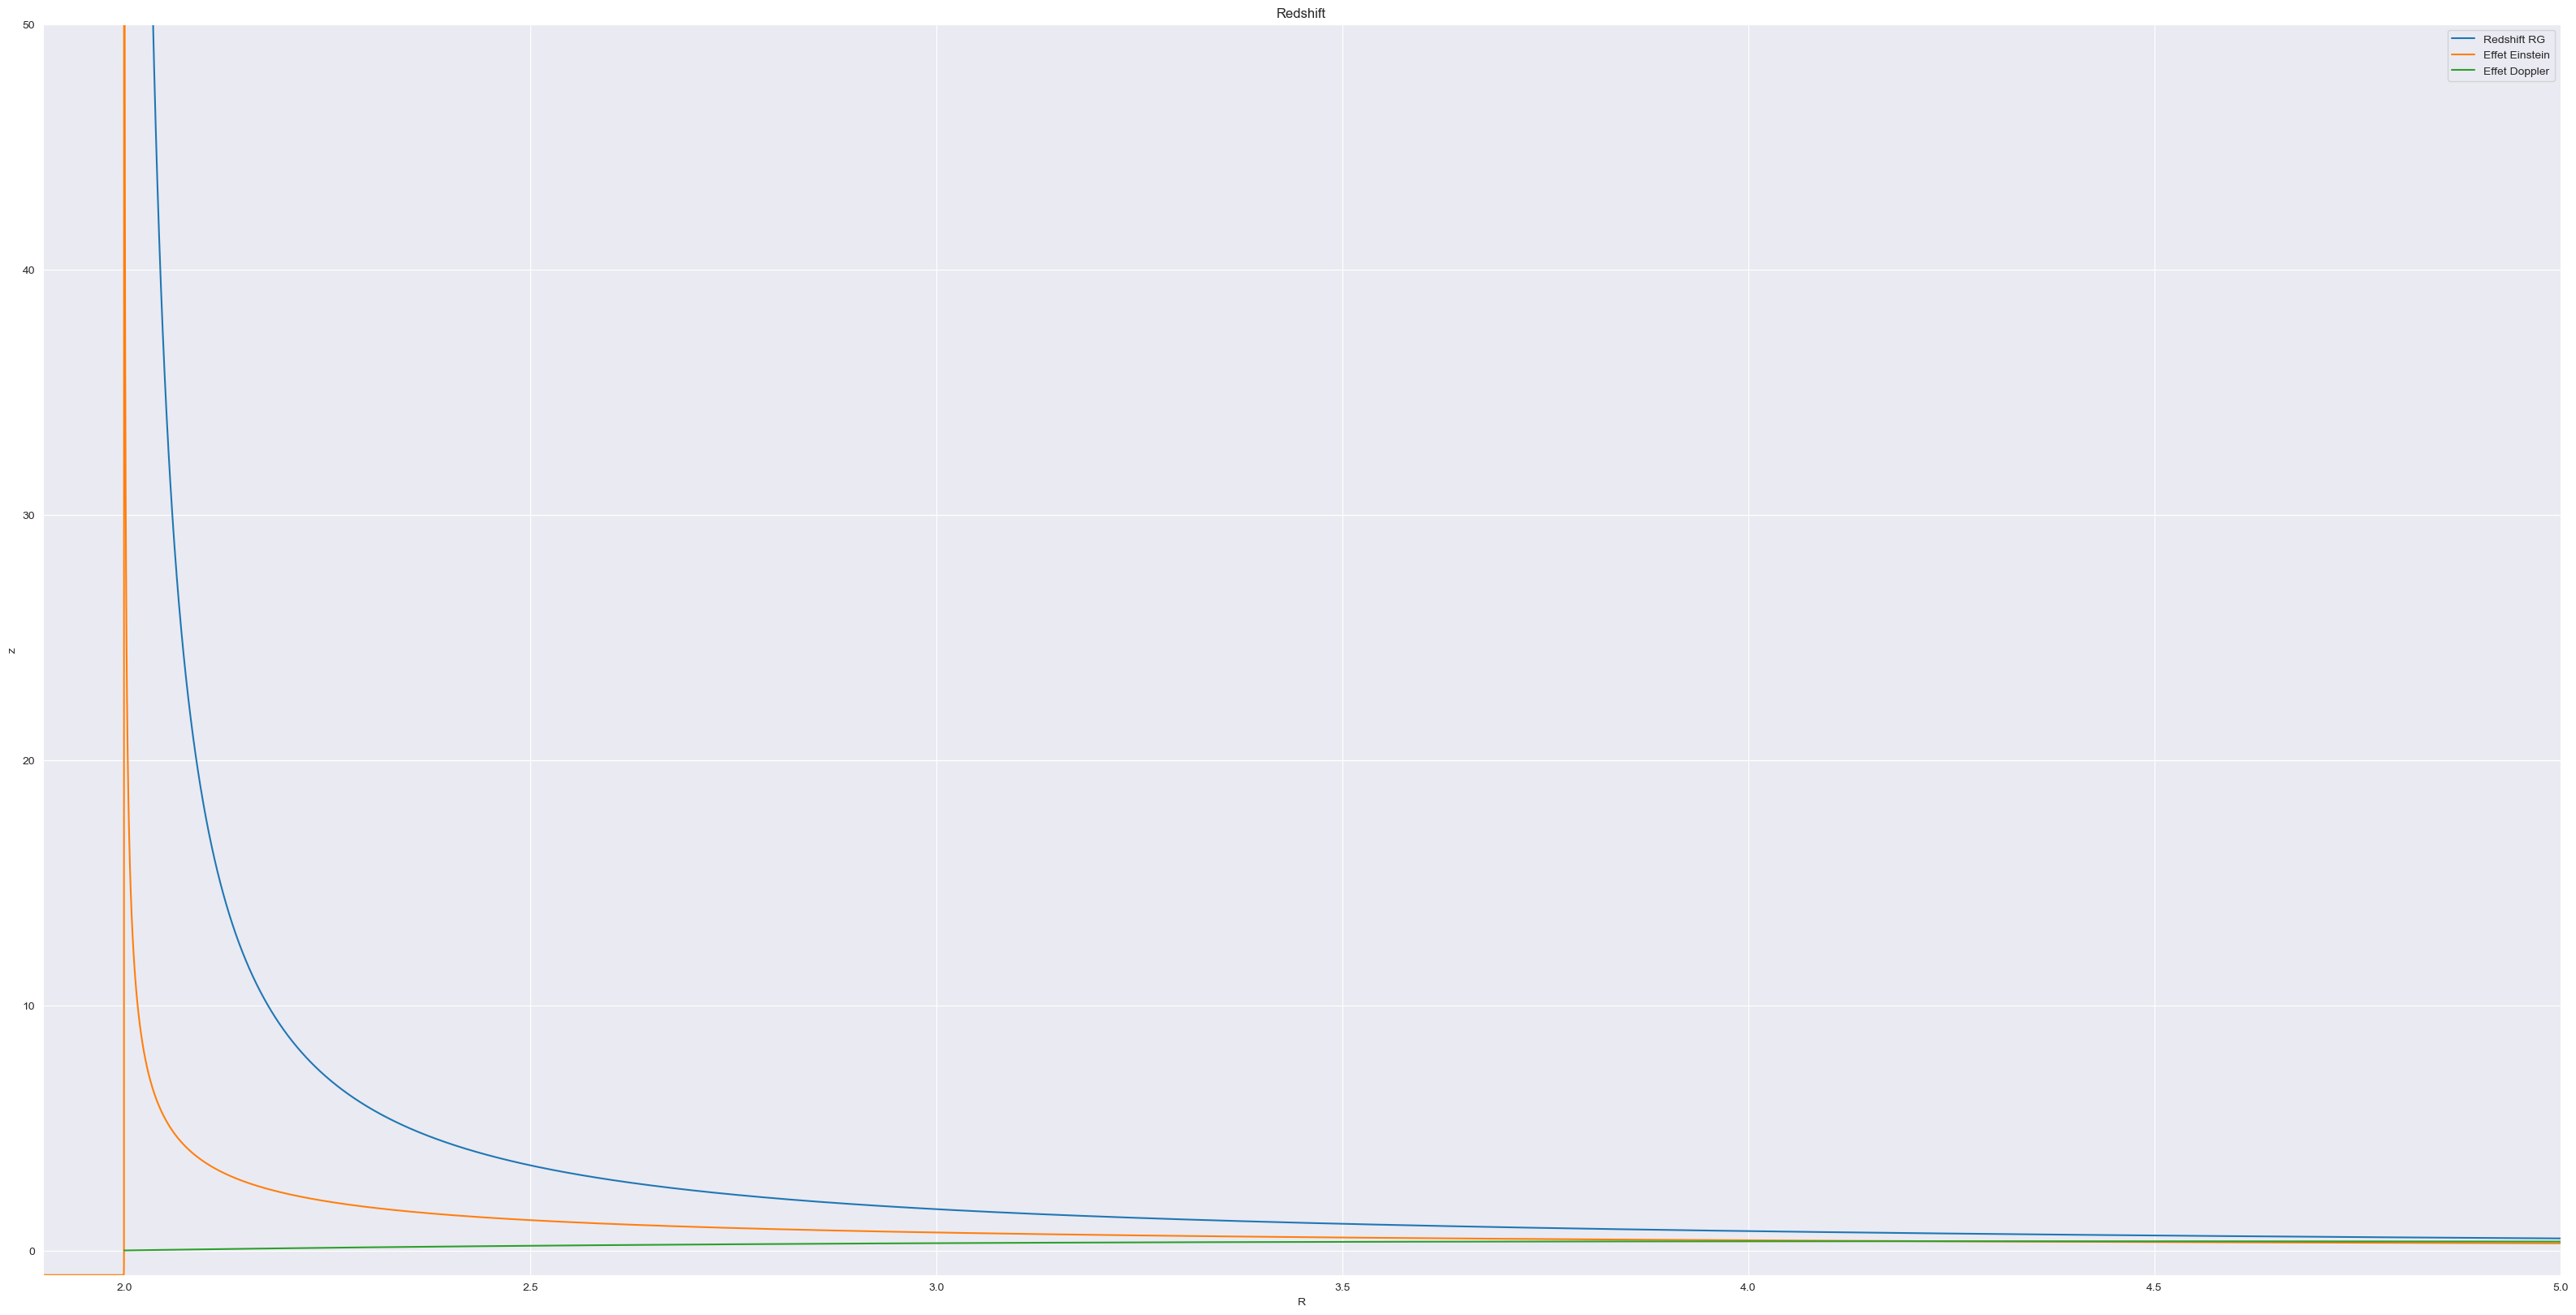

In [31]:
#Redshift lors du collapse: utilisation de la métrique de Schwarzschild
redshift=[]
lambda_recu=[]

for i in range(0,len(R_bis)):                                       #Calcul du redshift
  a=(1-2*M/R_bis[i])-v[i]**2/(1-2*M/R_bis[i])
  if a>=0:
    lambda_recu.append((1/sqrt(a))*lambda_emis)
  else:
     lambda_recu.append(0)

for i in lambda_recu:
  redshift.append((i-lambda_emis)/lambda_emis)


plt.plot(R_bis,redshift)
plt.plot(R,Effet_Einstein)
plt.plot(R_bis,Doppler)
plt.axis([1.9,5,-1,50])
plt.title("Redshift")
plt.xlabel("R")
plt.ylabel("z")
plt.legend(['Redshift RG','Effet Einstein','Effet Doppler'])



## Métrique à l'intérieur de l'étoile

Pour calculer la métrique à l'intérieur de l'étoile, on rappelle les hypothèses faites. En premier lieu, lorsque l'étoile arrive à la fin de sa vie, et n'a plus de réactifs (Hydrogène, Helium, Carbone, Oxygène...) pour continuer la fusion nucléaire, l'étoile va commencer à s'effondrer sur elle même, à cause de sa propre masse. Si on suppose que les réactions s'arrêtent instantanément, la surface de l'étoile va commencer à rejoindre le centre en $r = 0$. On va alors considérer à cet instant que l'étoile ne sera composé que de poussière, de matière froide. L'équation d'état est la suivante : $P = (\gamma - 1)u = 0$. On ne supposera donc qu'aucune pression n'ira à l'encontre de l'implosion de l'étoile. Il s'agit alors d'un problème de relativité générale uniquement, tout quantité thermodynamique étant ignoré.

Il s'agit donc de décrire, d'un point de vue intérieur, l'effondrement d'une sphère $R_i$ homogène et isotrope sous son propre poids. 

La métrique de Friedmann-Lemaître-Robertson-Walker permet de décrire une univers fermé, ouvert ou plat. Cet univers doit de plus être homogène et isotrope. Un facteur d'échelle $a$ permet de le décrire en expansion ou en contraction. Dans le cas d'une sphère, c'est un espace fermé, donc $k = 1$.
L'élément de longueur d'espace-temps prend donc la forme suivante :
$$
ds^2 = - c^2d\tau^2 + a(\tau)^2(d\chi^2 + R_i^2\sin(\chi/R_i)^2d\Omega^2) 
$$
En seul présence de matière froide et sans constante cosmologique, on a l'équation différentielle suivante pour décrire l'évolution du facteur d'échelle :
$$
\big(\frac{\dot{a}}{a}\big)^2 = \frac{8\pi G}{3}\rho - \frac{c^2}{a^2}
$$
Etant donné qu'il s'agit d'une équation différentielle du premier ordre, avec l'unique condition initiale $a(t = 0) = a_0$, on arrive à la solution paramétrée suivante : 
$$
a(\eta) = \frac{1}{2}a_0(1 + \cos(\eta))
$$
$$
\tau = \frac{1}{2}a_0(\eta + \sin(\eta))
$$
Comme $d\tau = ad\eta$, on reconnait $\eta$ comme étant le temps conforme. 


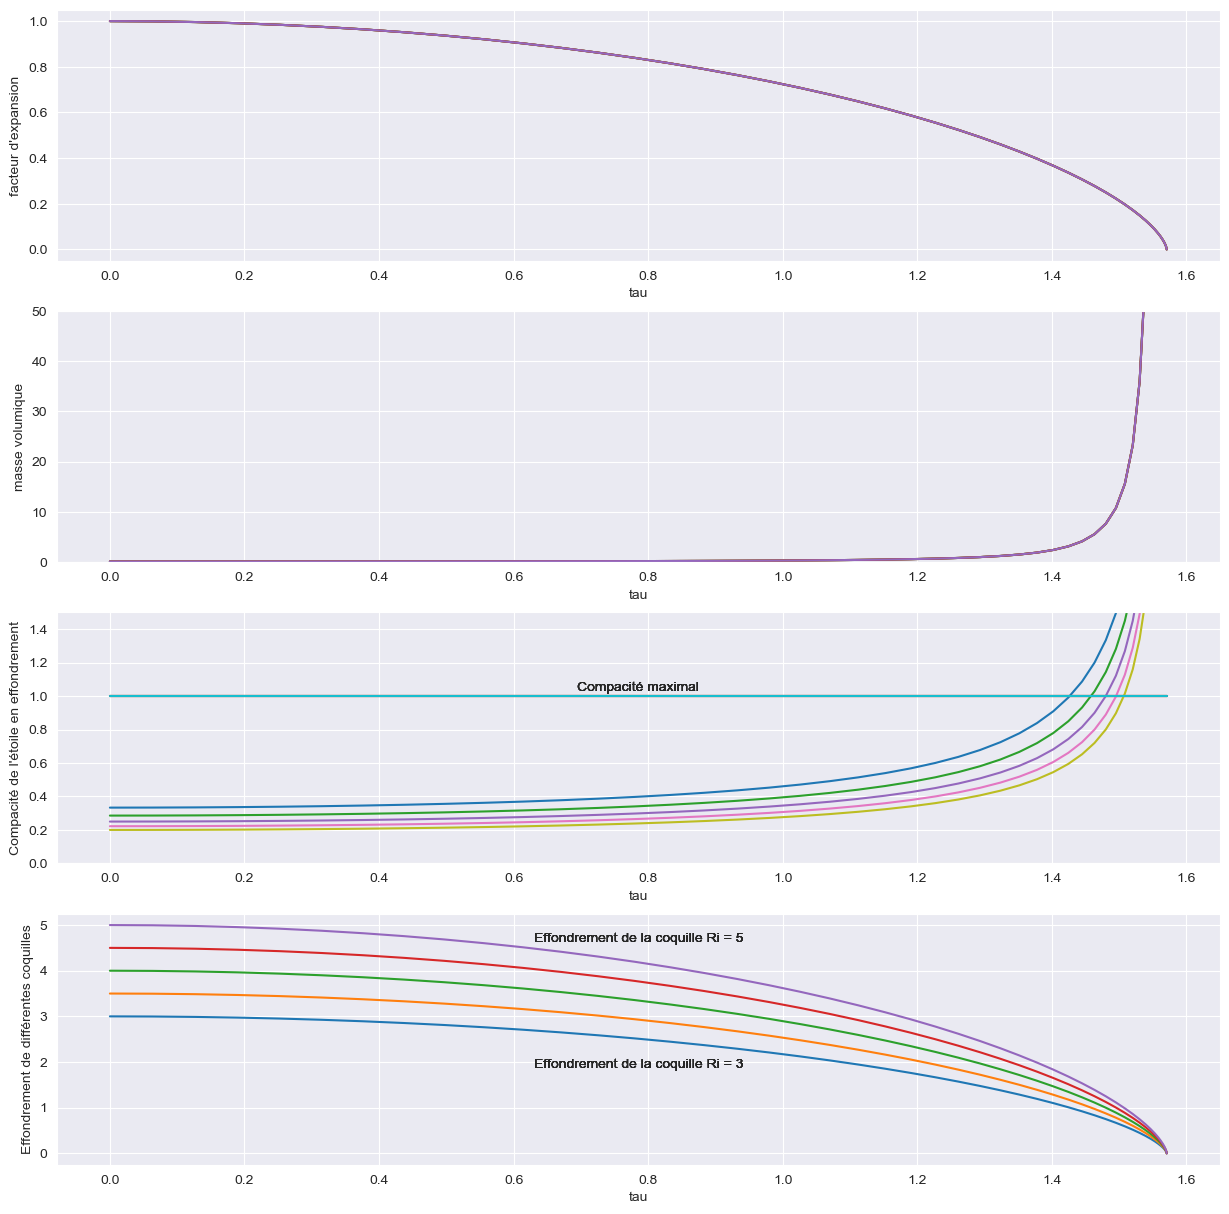

In [32]:
fig,axs = plt.subplots(4,1)
fig.set_figheight(15)
fig.set_figwidth(15)
M = 1
Nbe_point = 50
eta = np.linspace(0,0.99*np.pi,Nbe_point)
am = 1
R_astre = np.linspace(3,5,5)
for  r in R_astre:
  a = 1/2*am*(1 + np.cos(eta))
  Xsi = [M/(r*a[i]) for i in range(Nbe_point)]
  tau = 1/2*am*(eta + np.sin(eta))
  rho = 3*am/(8*np.pi)/a**(3)
  axs[0].plot(tau,a)
  axs[0].set_xlabel('tau')
  axs[0].set_ylabel("facteur d'expansion")

  axs[1].plot(tau,rho)
  axs[1].set_xlabel('tau')
  axs[1].set_ylim(0,50)
  axs[1].set_ylabel("masse volumique")

  axs[2].plot(tau,Xsi)
  axs[2].plot(tau, [1 for i in range(len(tau))])
  axs[2].text(0.5, 0.7, 'Compacité maximal', horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes)
  axs[2].set_xlabel('tau')
  axs[2].set_ylim(0,1.5)
  axs[2].set_ylabel("Compacité de l'étoile en effondrement")

  axs[3].plot(tau,a*r)
  axs[3].set_xlabel('tau')
  axs[3].set_ylabel("Effondrement de différentes coquilles")
  axs[3].text(0.5, 0.4, 'Effondrement de la coquille Ri = 3', horizontalalignment='center', verticalalignment='center', transform=axs[3].transAxes)
  axs[3].text(0.5, 0.9, 'Effondrement de la coquille Ri = 5', horizontalalignment='center', verticalalignment='center', transform=axs[3].transAxes)